# Housing Price Prediction

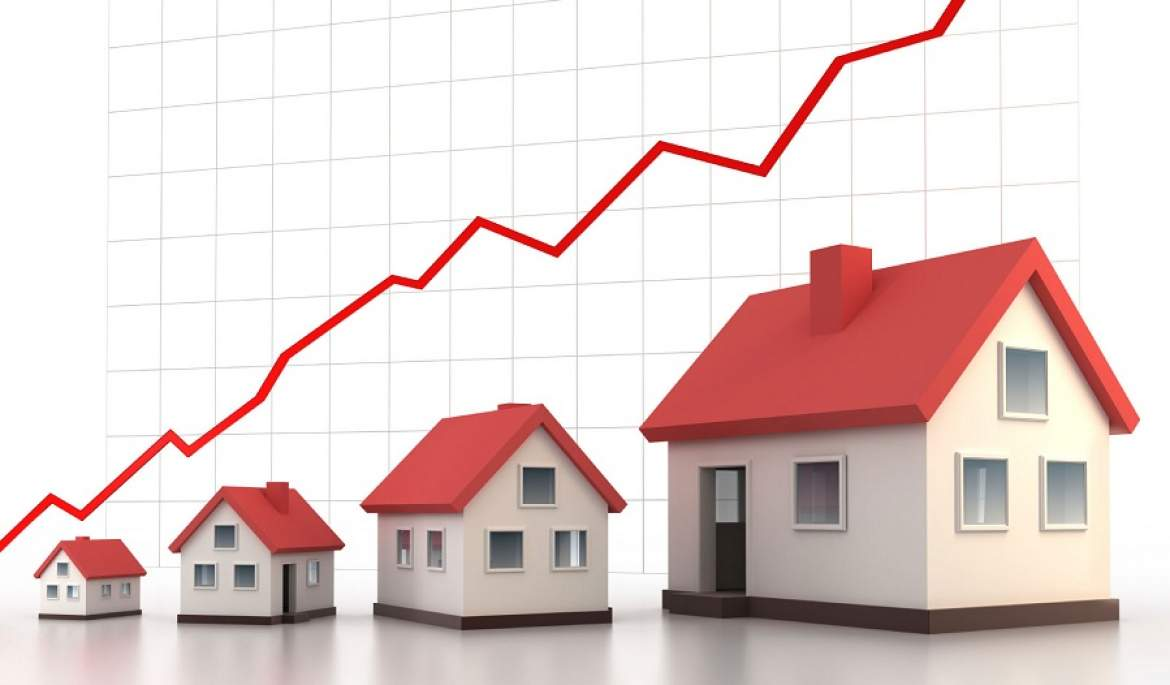

## Problem Statement 
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 


The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

1. Which variables are significant in predicting the price of a house, and

2. How well those variables describe the price of a house.


Also, determine the optimal value of lambda for ridge and lasso regression.


## Business Goal 


You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Methodology
Model development is divided into multiple steps as mentioned below,

- Data exploring and understanding: This step involves preliminary level data understanding and exploring.
- Data Cleaning: This step includes cleaning the existing data. We check the data for any missing values and treat them as per the requirements. We also need to look for constant value colulmns as that is not going to add any additional value to out analysis. Sometimes columns with very high proportion of any particular value also doesn't add any values. Hence, getting rid of them helps with further analysis.
- Data Visualization: This step involves visualizing our dataset and check for relationship amongst independent variables. We can also reduce some feature columns here but it should not be aggressive.
- Data Preparation: This step is mainly usefull for feeding in the data into the model. It involves steps like creating dummy variables, scaling etc. depending upond the data type.
- Train-test split: As data already training data this step may be skipped.
- Model Development-validation and evaluaiton: This steps involves training the model and validate it. It involves evaluating the model using relevant matrics.
- Conclusion/Recommendation: It involves drawing conclusions and recommendations to business.

### Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)
%matplotlib inline

### Reading Dataset

In [2]:
#Reading data
#Housing data= hd
hd= pd.read_csv("train.csv")
hd.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
hd.Condition2.value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

## 1. Data Understanding and Exploration

In [4]:
#Understanding data
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Lets check null values 
hd.isnull().sum()/hd.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [6]:
#Dropping columns with null value ~50% including variable FireplaceQu having 47.26% null values. 
#Further Nill value label is avaible in theses variables thus chances of these null vales being None are less.
hd=hd.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis = 1)

In [7]:
#As we can see there are multiple categorical varaibles lets list them out as ordinal, nominal categorical variables,
#Continous/numeric variavles, year & month etc.
nominal = ["MSSubClass","MSZoning","Street","LandContour","Utilities","LotConfig","LandSlope"
    ,"Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st"
    ,"Exterior2nd","MasVnrType","Foundation","Heating","HeatingQC","CentralAir","Electrical","Functional"
    ,"GarageType","PavedDrive","SaleType","SaleCondition"]

ordinal = ["LotShape","OverallQual","OverallCond","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure",
         "BsmtFinType1","BsmtFinType2","KitchenQual","GarageFinish","GarageQual","GarageCond"]

numeric = ["LotFrontage","LotArea","MasVnrArea","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF",
         "LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr",
         "KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","GarageArea","WoodDeckSF",
        "OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","BsmtFinSF1","BsmtFinSF2"]

year_month = ["YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]

In [8]:
#Lets check for dupliacte values
hd.duplicated().value_counts()

False    1460
dtype: int64

## 2. Data Visualization

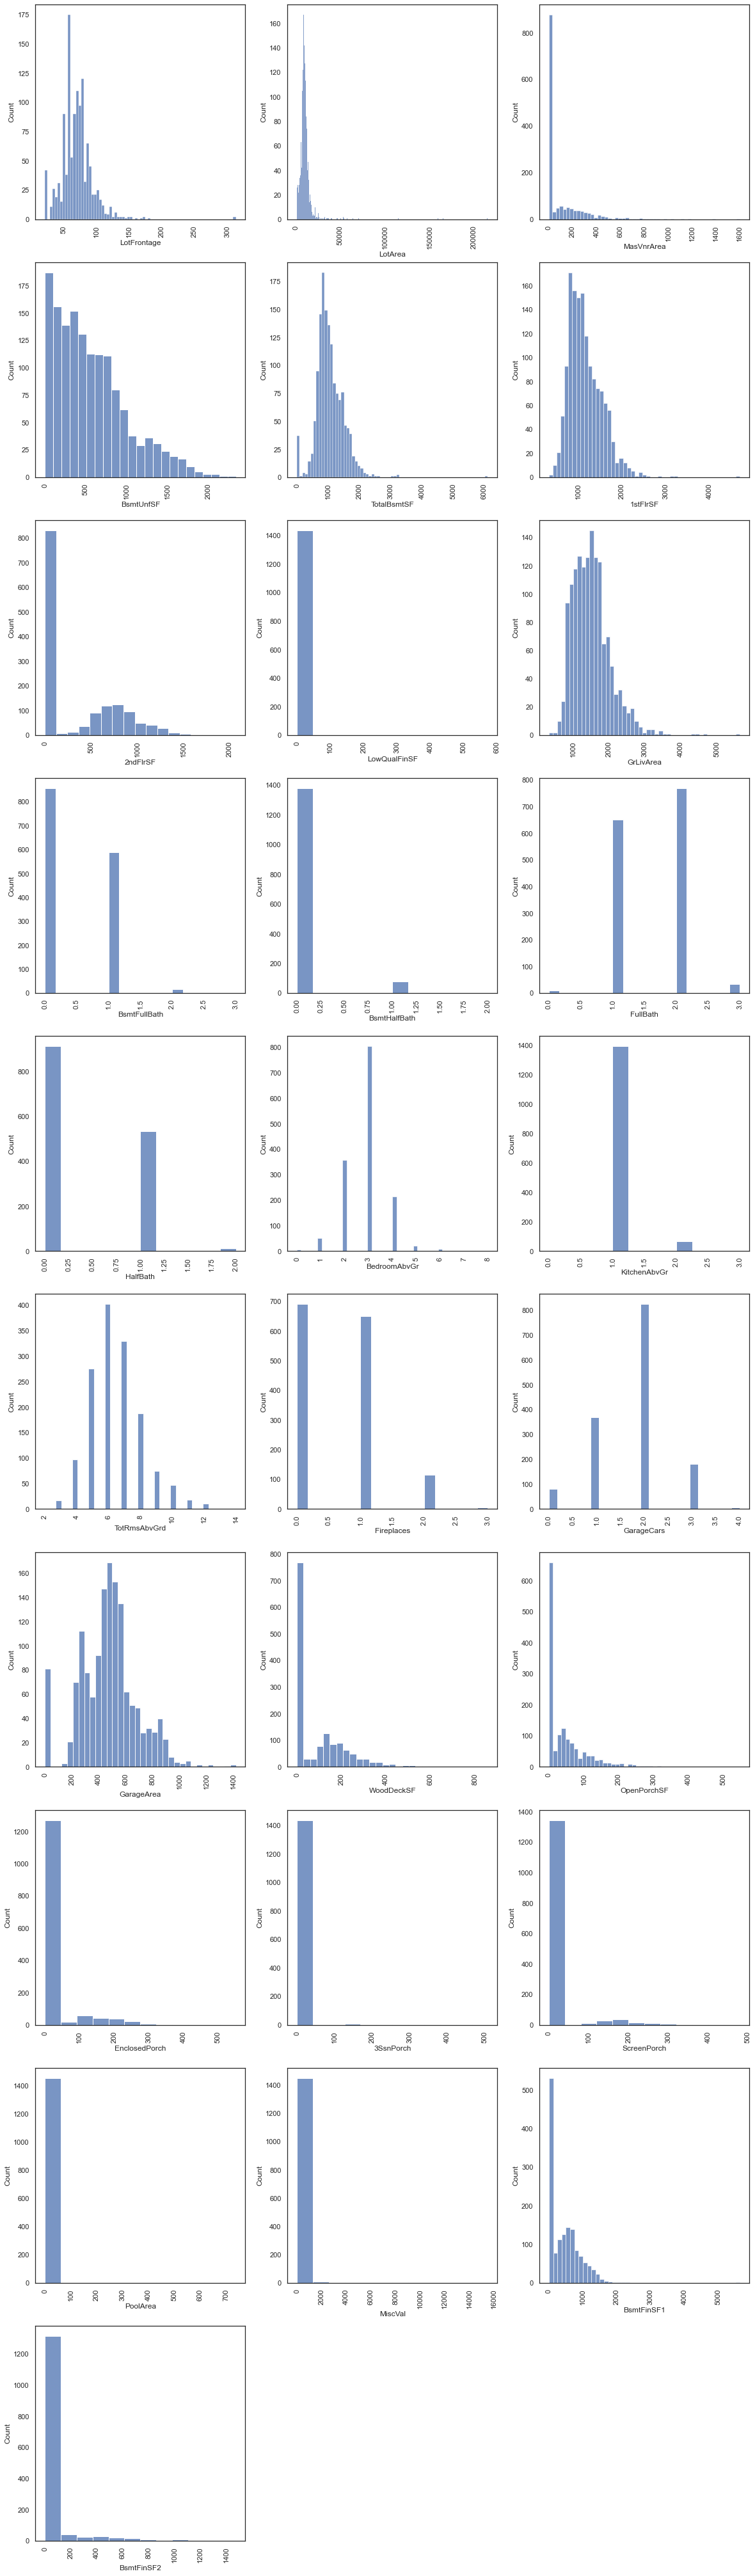

In [9]:
# lets check distribution of all the numeric variables
plt.subplots(figsize=(20,110))
   
j=1
for i in numeric:
    plt.subplot(int((len(numeric)/2)+1),3,j)
    sns.histplot(hd[i])
    plt.xticks(rotation=90)
    j=j+1 

In [10]:
# ALl the Numeric variables are either int or float type data type
#Lot size and MiscVal has higher values in comparison to other numeric varaibles, thus they will be analyzied seperately
numeric.remove("LotArea") 
numeric.remove("MiscVal") 

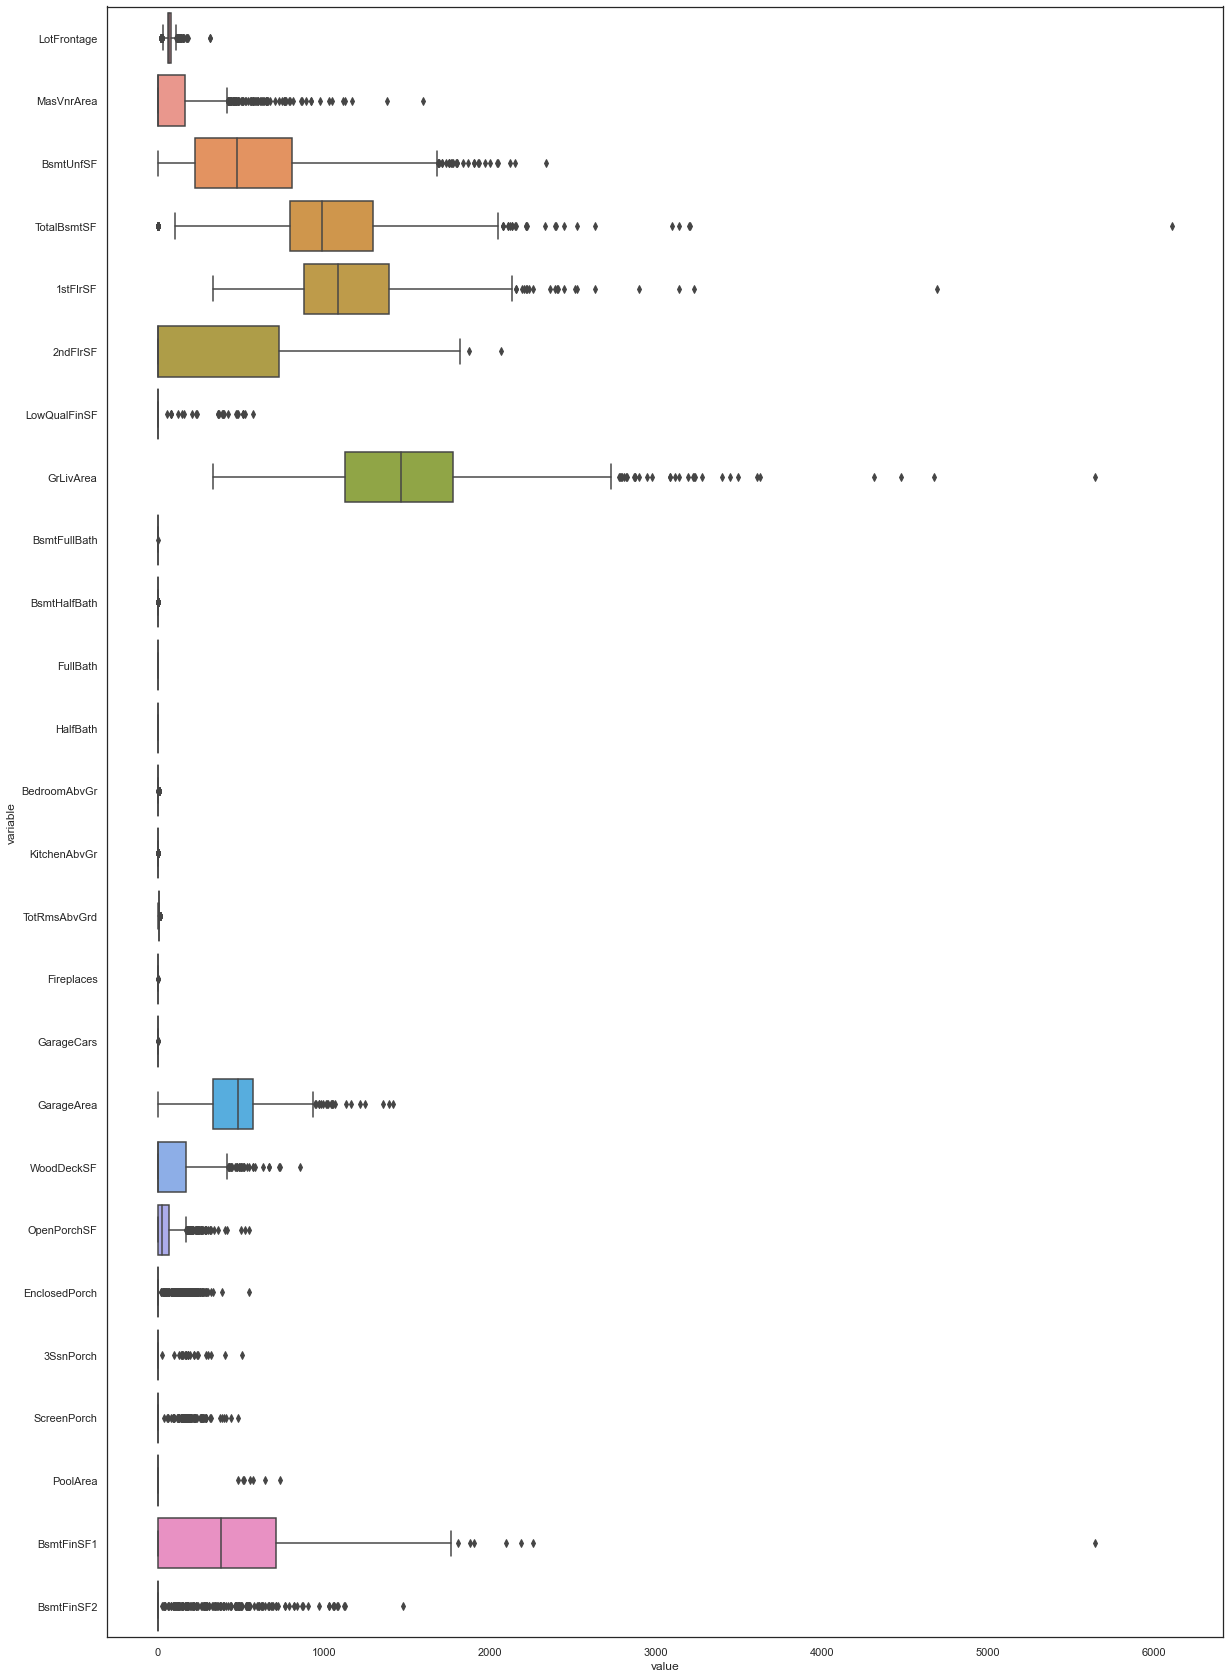

In [11]:
#Lets do the univariate analysis on Numeric data typesLotArea
plt.figure(figsize=(20,30))
sns.boxplot(x="value", y="variable",data=pd.melt(hd[numeric]))
plt.show()

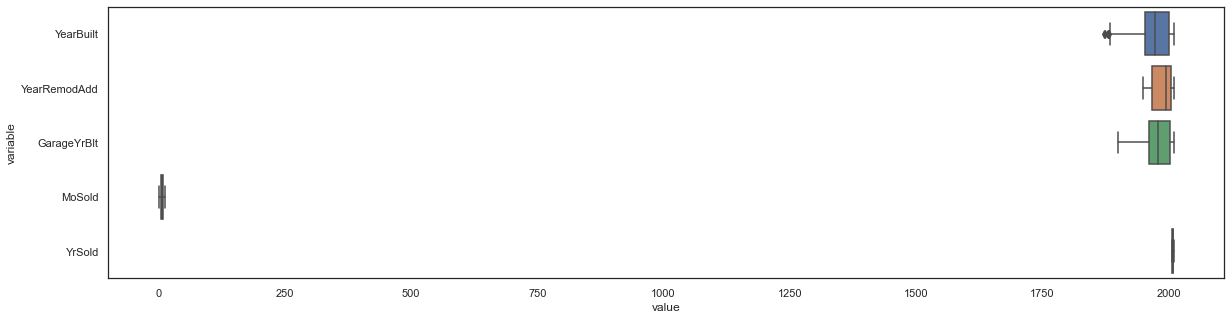

In [12]:
#Lets also check outliers in year and month data
plt.figure(figsize=(20,5))
sns.boxplot(x="value", y="variable",data=pd.melt(hd[year_month]))
plt.show()

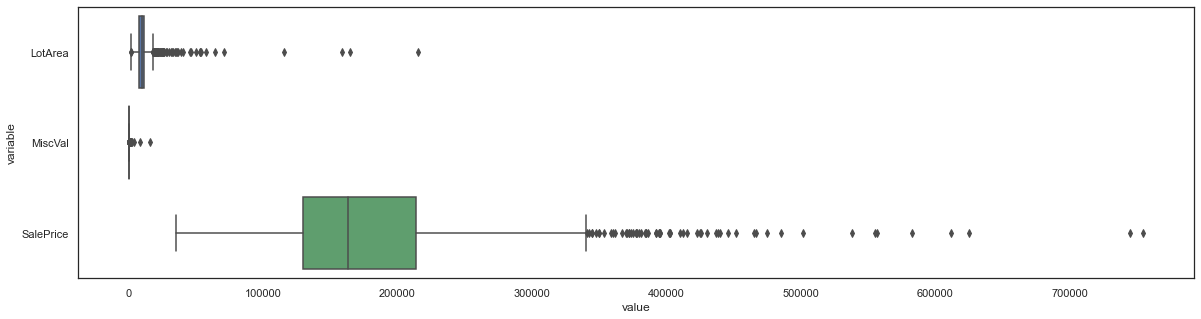

In [13]:
#box plot for LotArea and MiscVal variable
plt.figure(figsize=(20,5))
sns.boxplot(x="value", y="variable",data=pd.melt(hd[["LotArea","MiscVal","SalePrice"]]))
plt.show()

There are lots of outliers in various columns like LotArea, BsmtFinSF2, GrLivArea, 1stFlrSF etc. and we have to treat them before modeling. 

In [14]:
numeric.append("LotArea") 
numeric.append("MiscVal")

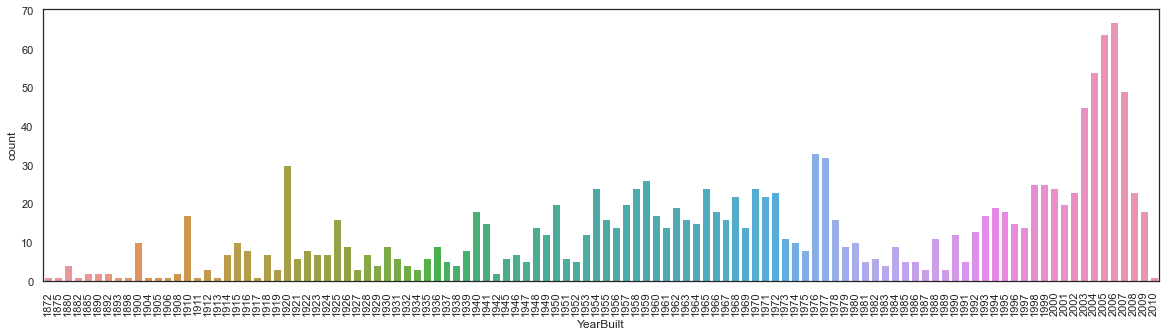

In [15]:
#Lets Visualize frequency of houses built in each year
#year_month = ["YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]
hd_YearBuilt=hd.sort_values("YearBuilt", axis =0)
plt.figure(figsize=(20,5))
sns.countplot(hd_YearBuilt["YearBuilt"])
plt.xticks(rotation =90)
plt.show()

There is a significant increase in houses being built around 2003 to 2007, may be leading to housing crash of 2008 :p

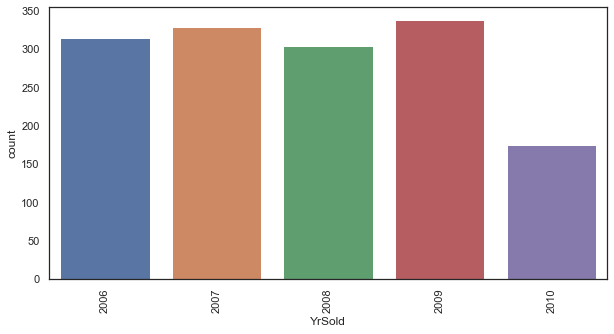

In [16]:
#Lets Visualize frequency of sales made in each year
hd_YrSold=hd.sort_values("YrSold", axis =0)
plt.figure(figsize=(10,5))
sns.countplot(hd_YrSold["YrSold"])
plt.xticks(rotation =90)
plt.show()

There is no regular trend among no. of houses sold except that no. of houses sold in 2010 has significantly decreased, however we donot know whether data is for complete year 2010  or not, so will not speculate regarding this.

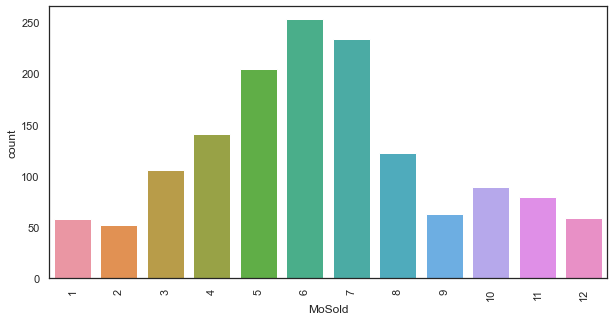

In [17]:
#Lets Visualize frequency of sales made in each month
hd_MoSold=hd.sort_values("MoSold", axis =0)
plt.figure(figsize=(10,5))
sns.countplot(hd_MoSold["MoSold"])
plt.xticks(rotation =90)
plt.show()

It seems like sales are higher in the month of May, June and July comapared to other months of year.

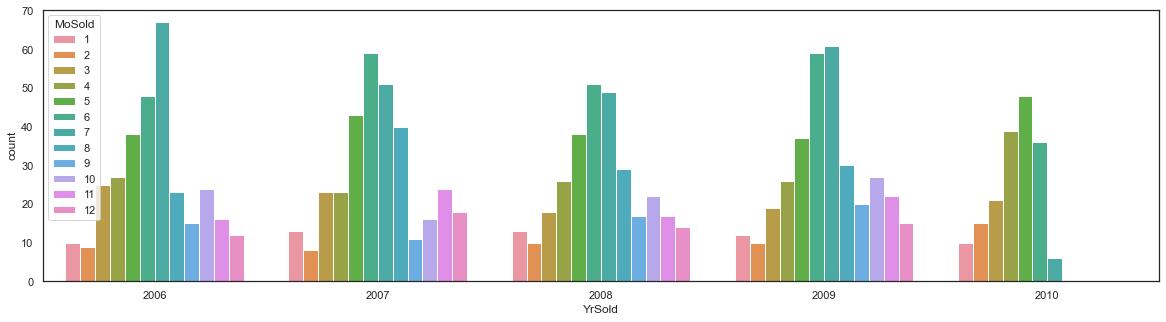

In [18]:
#Lets check whether above trend is same for all years in which houses were sold
plt.figure(figsize=(20,5))
#hd_month_yr=hd.groupby(["YrSold","MoSold"]).count().reset_index()
#hd_month_yr
sns.countplot(data=hd, x="YrSold", hue="MoSold")
plt.show()

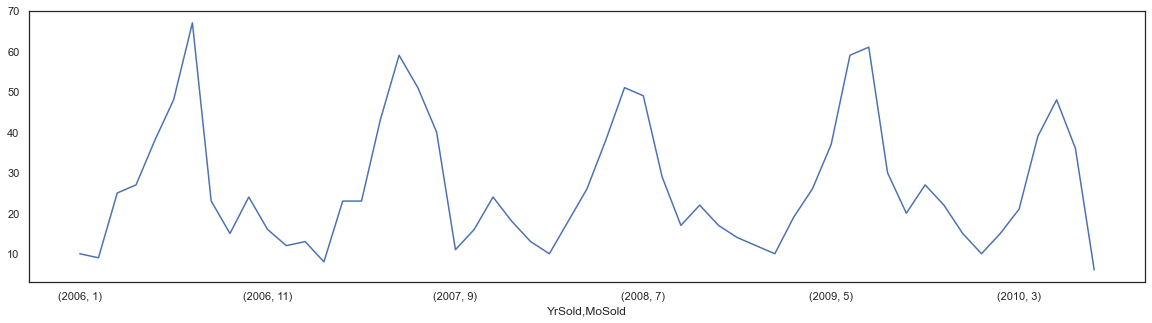

In [19]:
plt.figure(figsize=(20,5))
hd_month_yr=hd.groupby(["YrSold","MoSold"])["MoSold"].count().plot()
plt.show()

From above it is observed that sales are higher in the month of May, June and July compared to other months of year may be due spring season as the weather gets warmer in USA. Further, there is very small peak in month of October/Novemeber in sale of houses.
Also for year 2010 data is available till July month only.

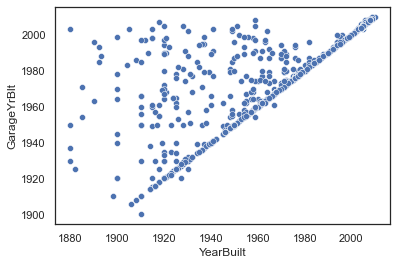

In [20]:
#Lets Visualize distribution among YearBuilt & GarageYrBlt
sns.scatterplot(data=hd,x="YearBuilt",y="GarageYrBlt")
plt.show()

After 1910 almost all the house are having garrages built along with construction of house due to rise in no of car user by 1910 in US.
- Source:
https://www.ushistory.org/us/46a.asp

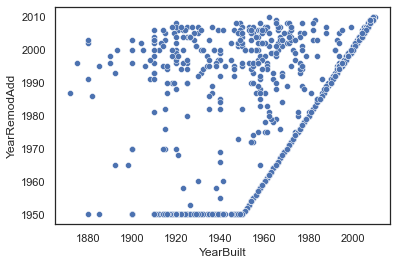

In [21]:
#Lets Visualize distribution among YearBuilt & YearRemodAdd
sns.scatterplot(data=hd,x="YearBuilt",y="YearRemodAdd")
plt.show()

After 1950 there has been no remodeling or additions performed on houses as in data it is specified that YearRemodAdd is same as construction date if no remodeling or additions.

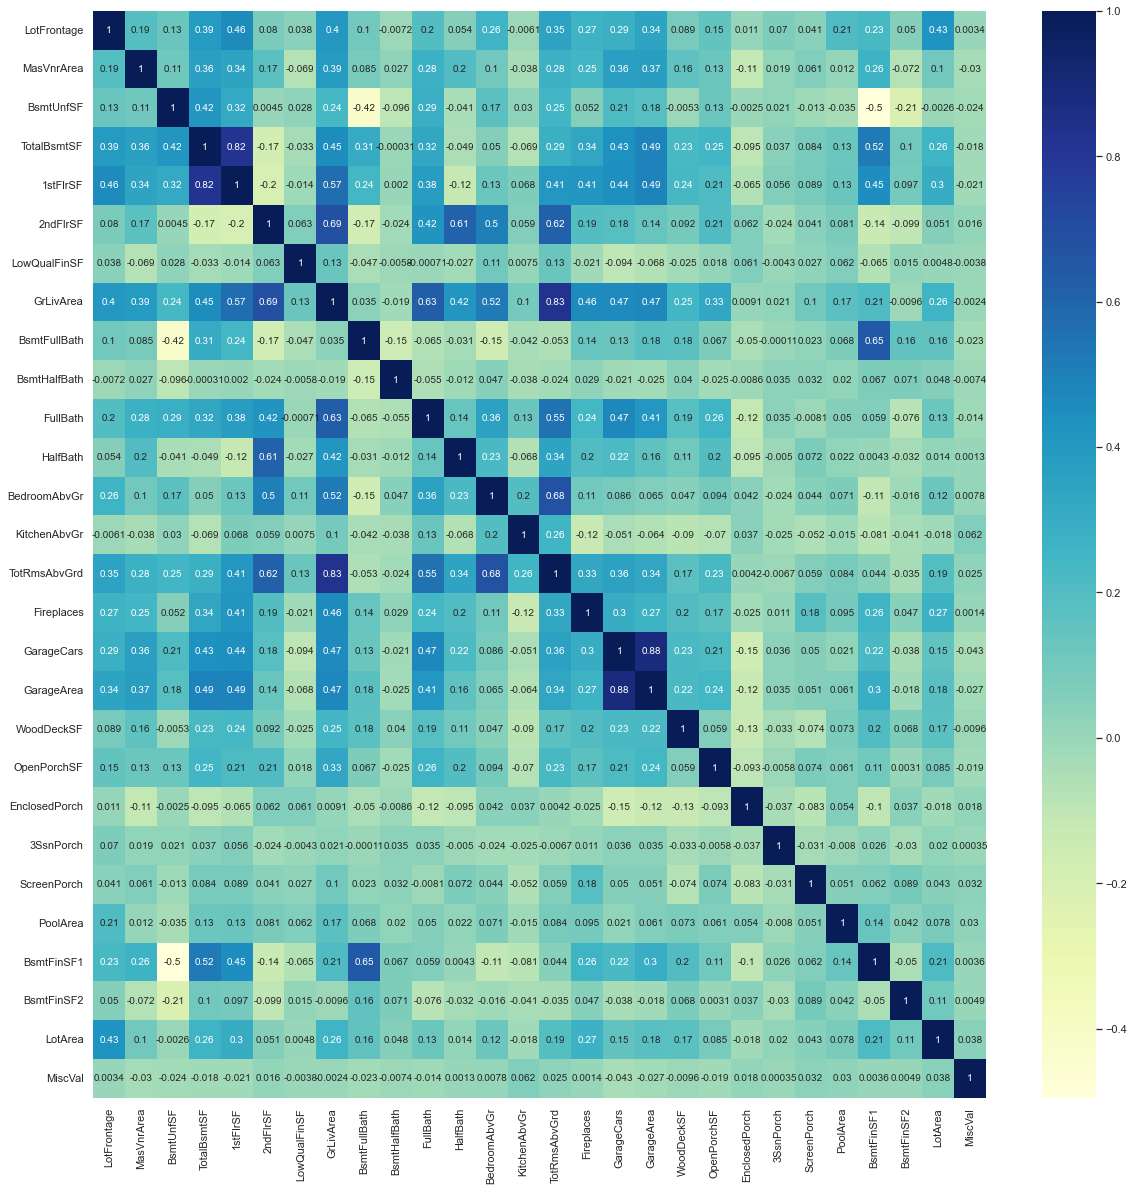

In [22]:
#Heatmap on numeric data
plt.figure(figsize=(20,20))
sns.heatmap(hd[numeric].corr(),annot= True,cmap="YlGnBu")
plt.show()

There are few columns with high corelation like (BsmtFinSF2 and BsmtfullBath),(GarageCars and Garage Area), (Ground Living area and TotRmsaboveGr),(Bedroom above ground and Total Room above Ground), (TotalBasment SF and  1st floor SF)  etc.

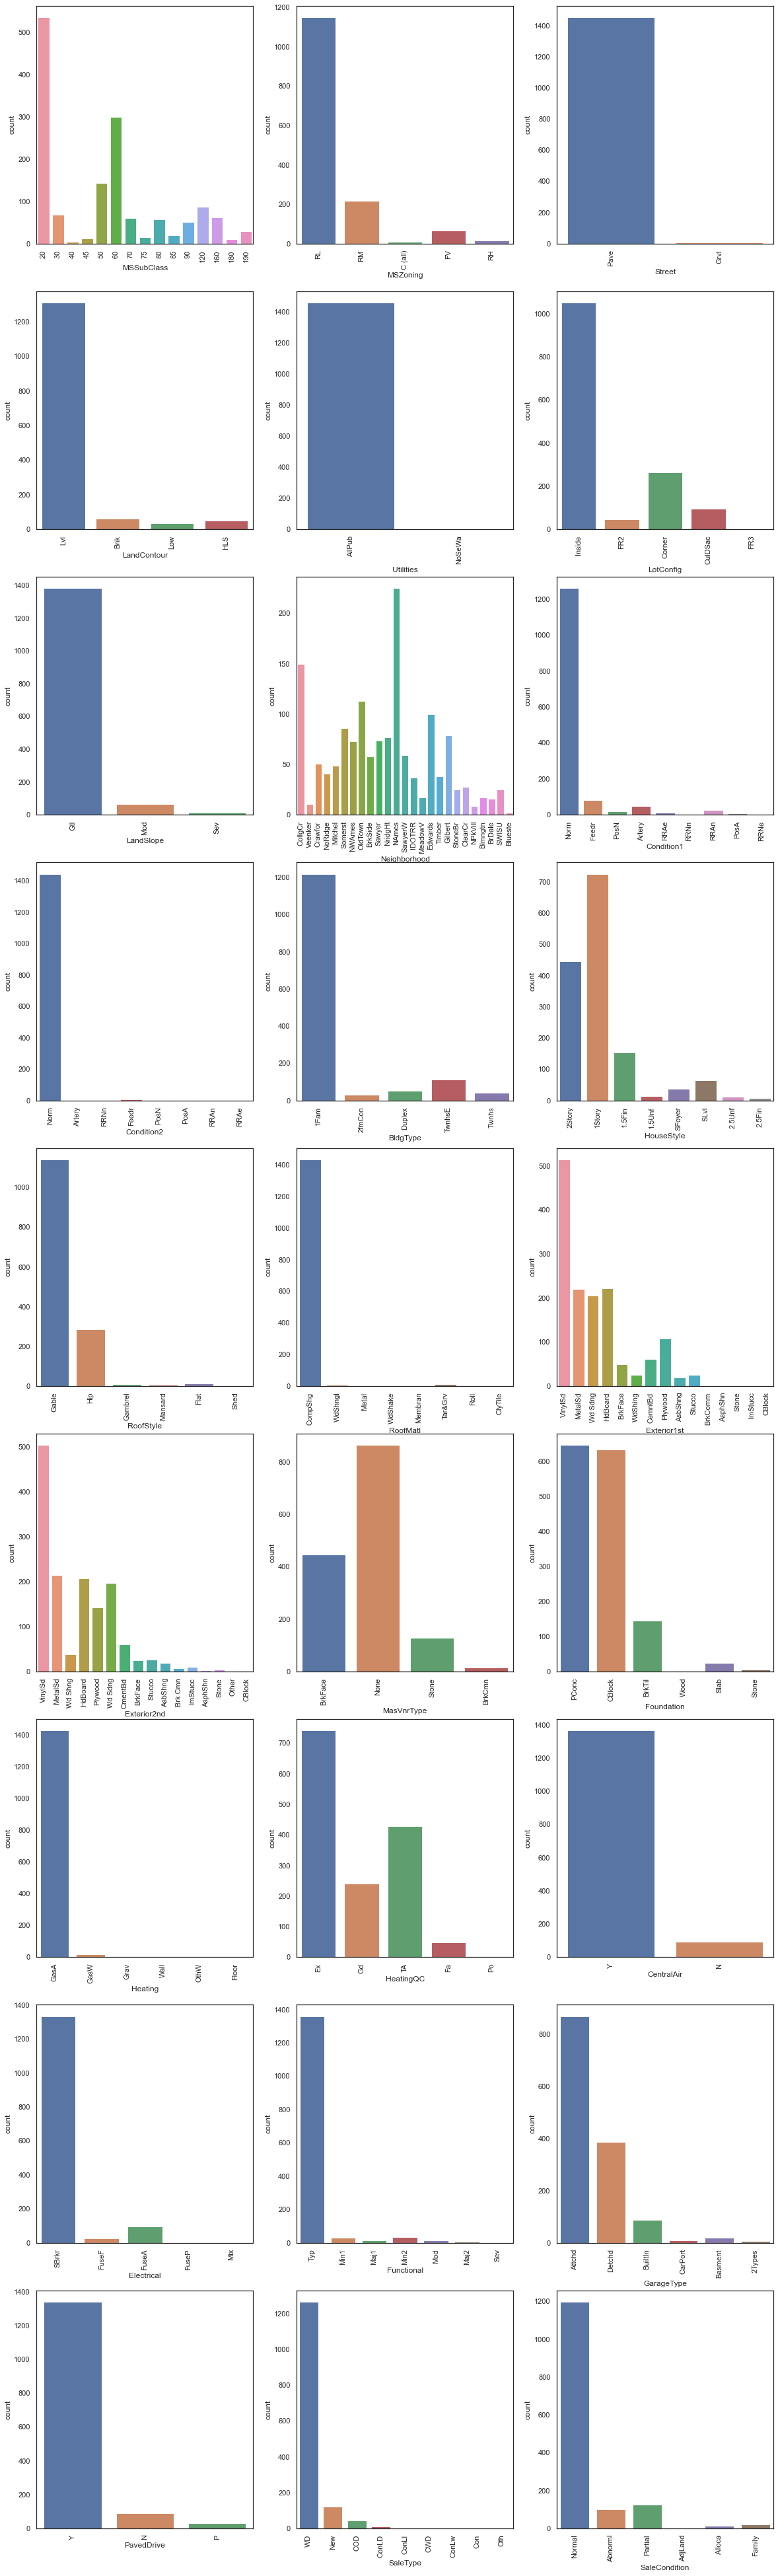

In [23]:
#Lets visualize countplot on Nominal data
plt.subplots(figsize=(20,110))
j=1
for i in nominal:
    plt.subplot(int((len(nominal)/2)+1),3,j)
    sns.countplot(hd[i])
    plt.xticks(rotation=90)
    j=j+1

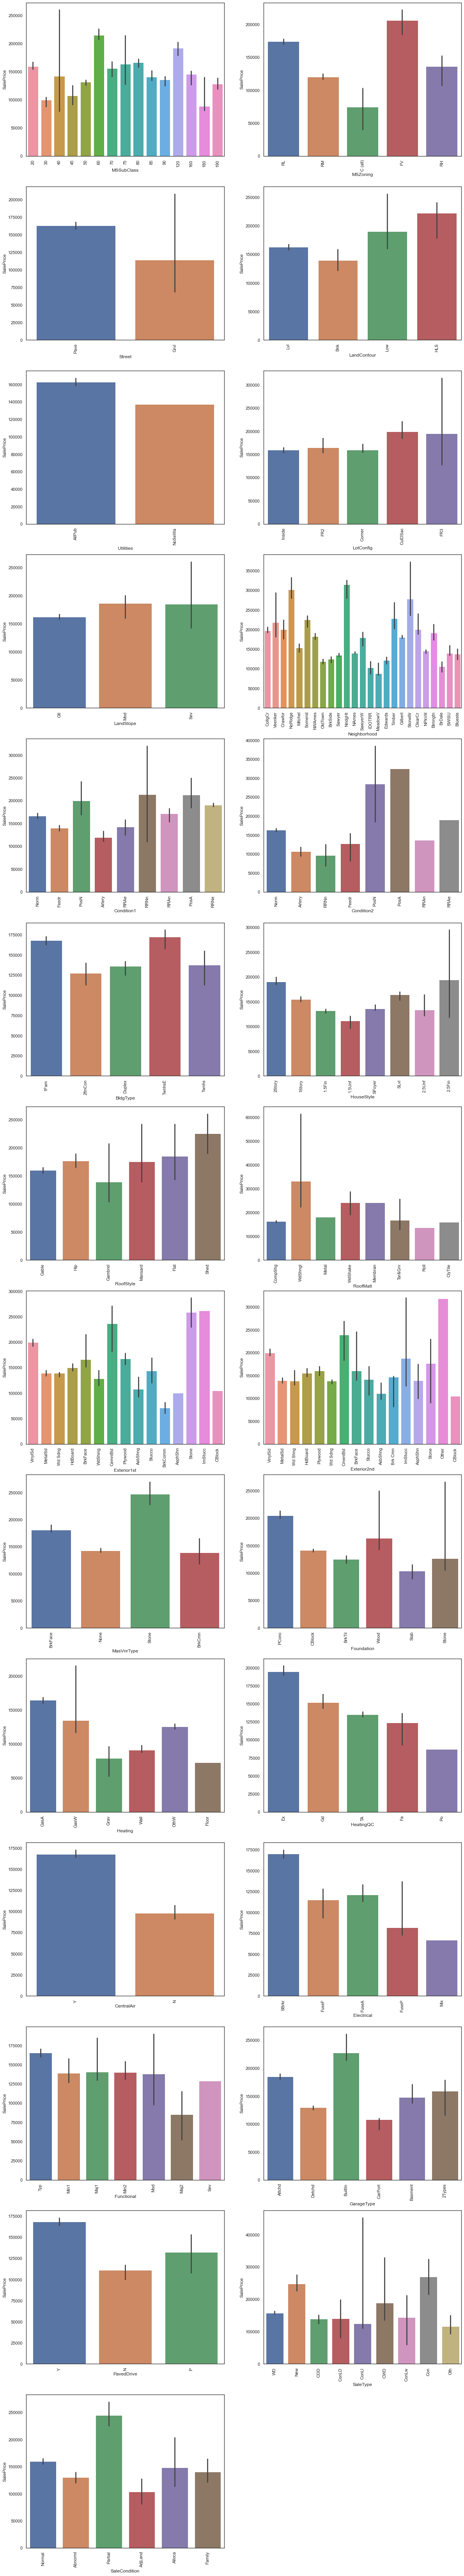

In [24]:
#Lets visualize distribution of sales price on Nominal data
plt.subplots(figsize=(20,120))
j=1
for i in nominal:
    plt.subplot(int((len(nominal)/2)+1),2,j)
    sns.barplot(data=hd, x=i, y="SalePrice", estimator=np.median) # as there are outliers in data median is selected as estimator
    plt.xticks(rotation=90)
    j=j+1

There is very vast variation for Sale Price for various labels in the nominal variables. 

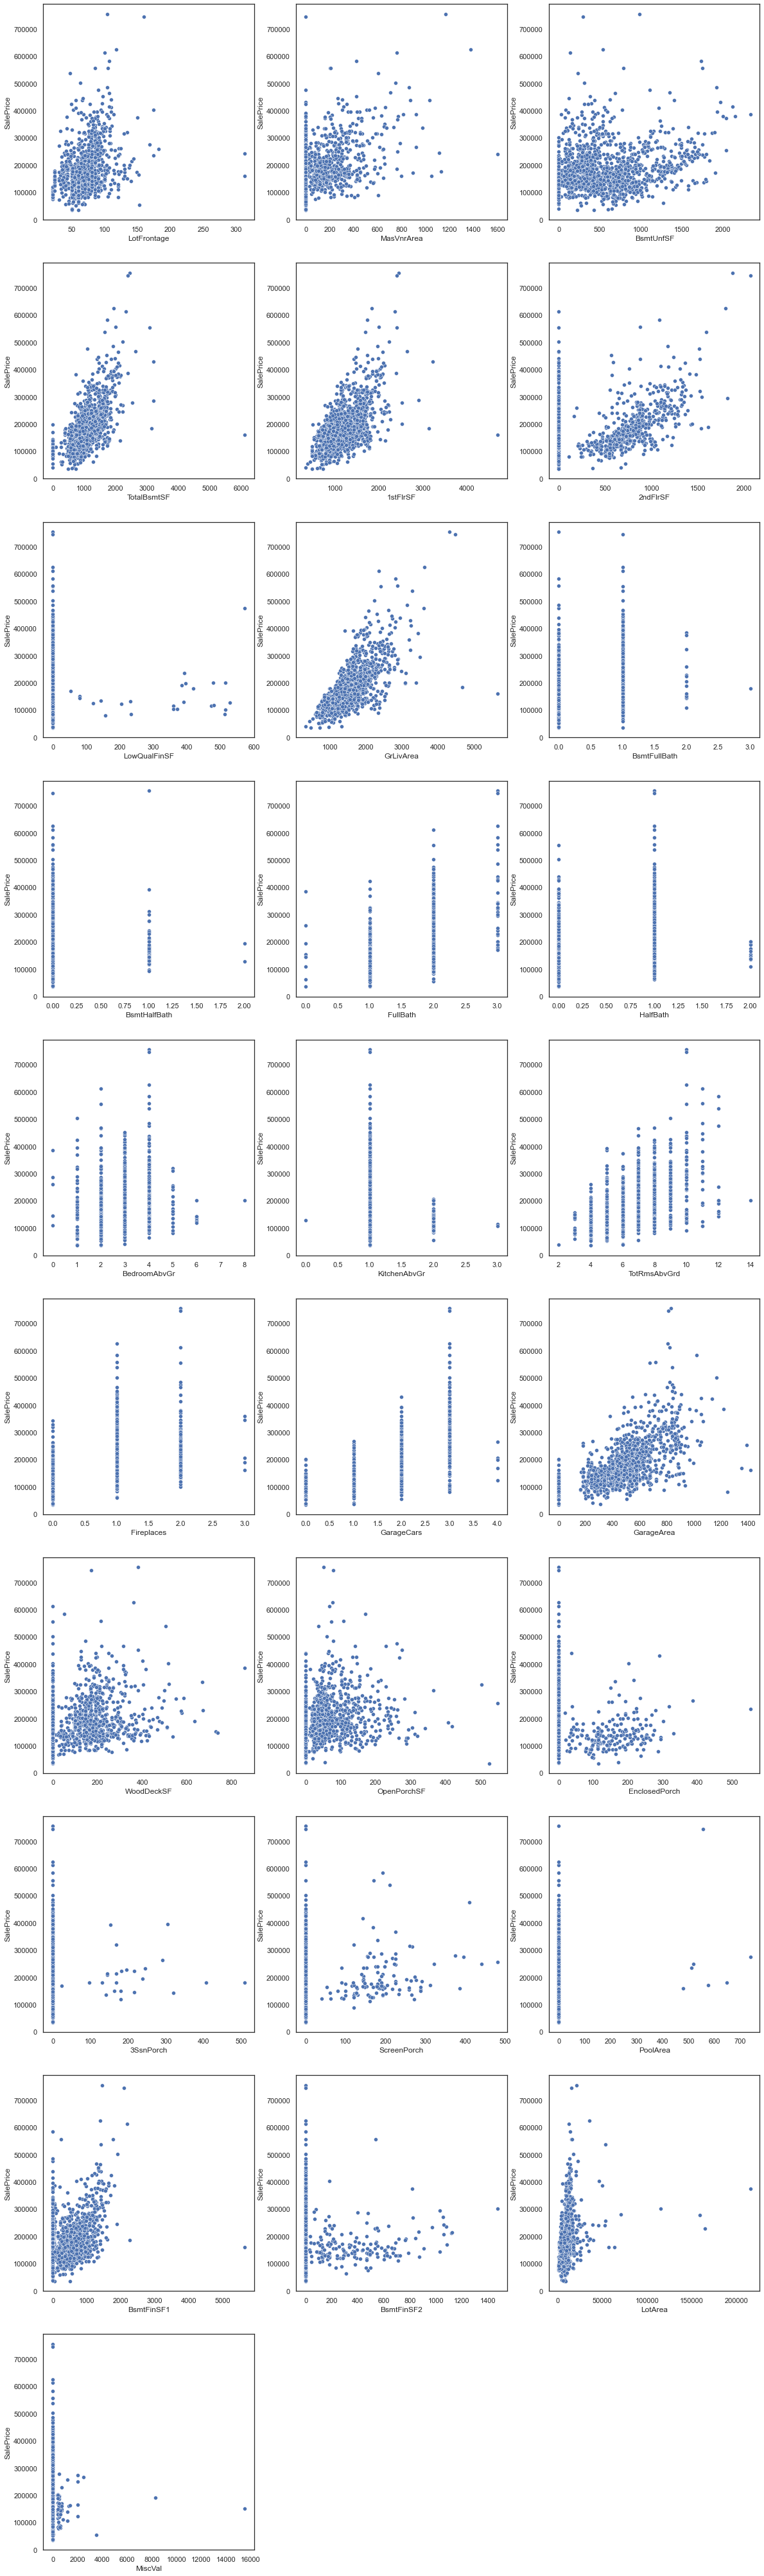

In [25]:
#Lets visualize countplot on Numeric data
plt.subplots(figsize=(20,110))
j=1
for i in numeric:
    plt.subplot(int((len(numeric)/2)+1),3,j)
    sns.scatterplot(data=hd, x=i ,y="SalePrice")
    j=j+1

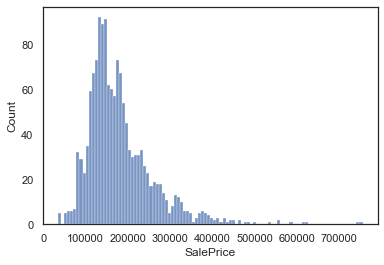

In [26]:
#Sale price is our dependent/target variable
#Lets check distribution of sales 
sns.histplot(hd.SalePrice, bins=100)
plt.show()

As we can distribution is highly right skewed and also there are mainy outliers in the data.

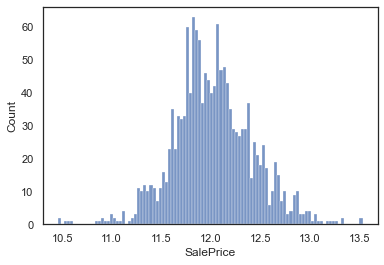

In [27]:
#Lets log transform our SalePrice as sales data is 
hd.SalePrice= np.log(hd.SalePrice)
sns.histplot(hd.SalePrice, bins=100)
plt.show()


As seen above after log transformation data is now more bell shaped/Guassian distribution and no. of ouliers has also reduced significantly. We will check distribution of SalePrice with all the numeric variables

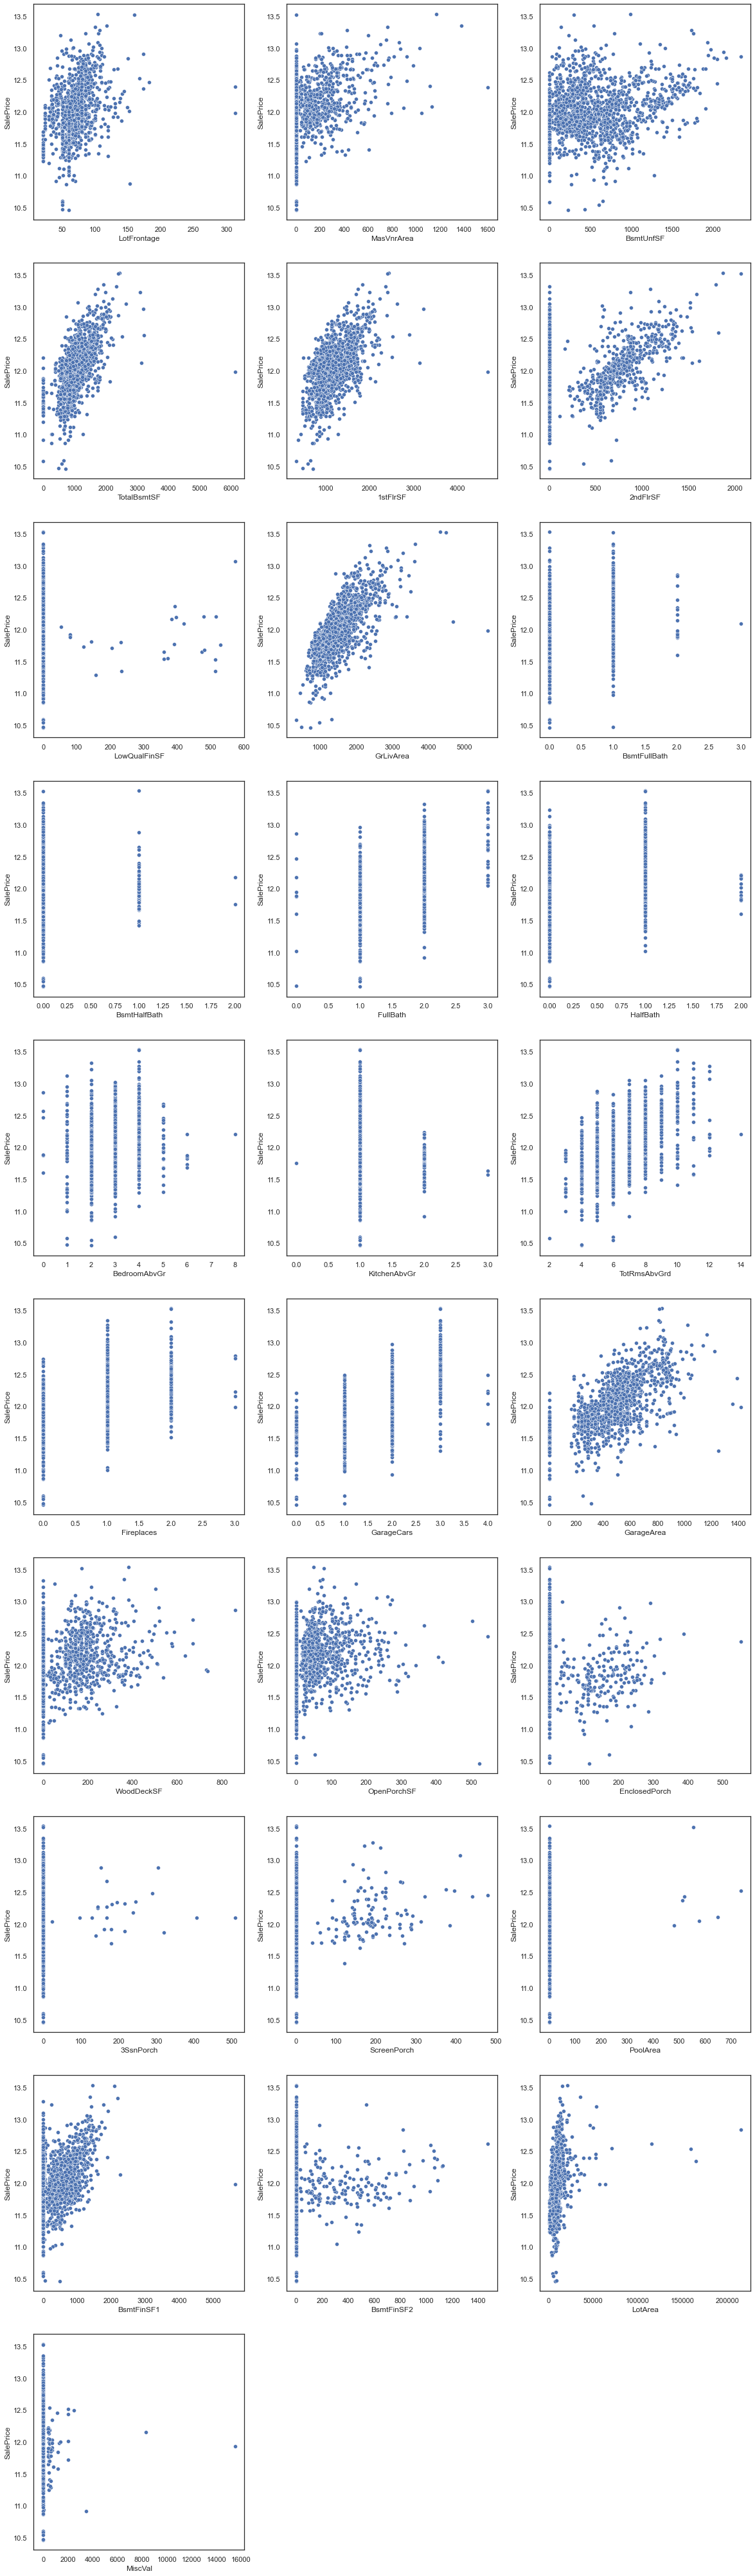

In [28]:
#Lets visualize countplot on Numeric data
plt.subplots(figsize=(20,110))
j=1
for i in numeric:
    plt.subplot(int((len(numeric)/2)+1),3,j)
    sns.scatterplot(data=hd, x=i ,y="SalePrice")
    j=j+1

After log transformation, as we can see above there are many independent Variable on which there is high correlation with Sale price like GrLivArea, TotalBsmtSF,Garage Area, 1stflrSF etc and linear relationship has also improved compared to earlier.

## 3.  Data Cleaning

### 3.1. Treating Outliers

As features columns have many outliers, we are going to drop outliers from the dataset and try to fit the algorithm. For dropping the outliers we are going to use Inter Quantile Range (IQR) method which is summarized below.

- Q1: First quanltile value or Value standing exactly at 10% (here).
- Q3: Value standing at exactly 90% (here) of the range.
- IQR is difference between Q3 and Q1 value. 

This indicates the core range for any feature which includes median as well.
Next is to drop the values which are beyond 1.5 times IQR away from either Q1 or Q3 in respective away direction. Here, away direction for Q1 is lower side and Q3 is upper side.

Note: Here we can use any value for selecting quantiles. The chosen values depend upon the amount of data available and its quality. Also we should not lose significant value of data while dropping outliers.

In [29]:
#Lets check % of outliers in the numeric variables
numeric_=numeric  +["SalePrice"]
outlietrs_dict={}
for i in numeric_:
  #IQR
  IQR= hd[i].quantile(0.90)-hd[i].quantile(0.10)
  Outliers= hd[(hd[i]>(hd[i].quantile(0.90)+1.5 * IQR)) | (hd[i]<(hd[i].quantile(0.10)-1.5 * IQR))]
  outlietrs_dict[i]=Outliers.shape[0]

In [30]:
outlier_data=pd.DataFrame([outlietrs_dict]).T
outlier_data.rename(columns={0:"No_of_outliers"}, inplace =True)
outlier_data["Outlier%"]=outlier_data["No_of_outliers"]/hd.shape[0]*100
outlier_data.sort_values("Outlier%", ascending =False, inplace =True)
outlier_data

,No_of_outliers,Outlier%
ScreenPorch,116,7.945205
BsmtFinSF2,94,6.438356
BsmtHalfBath,82,5.616438
KitchenAbvGr,68,4.657534
MiscVal,52,3.561644
LowQualFinSF,26,1.780822
LotArea,24,1.643836
3SsnPorch,24,1.643836
MasVnrArea,13,0.890411
EnclosedPorch,9,0.616438


In [31]:
#As seen above there are lots of outliers in the dataset as we have limited data removing theses rows won't be a good idea.
#Let us perform flooring and capping on outliers

for i in numeric_:
    IQR= hd[i].quantile(0.90)-hd[i].quantile(0.10) #Interquartile range
    upper_bound=hd[i].quantile(0.90)+1.5 * IQR
    lower_bound=hd[i].quantile(0.10)-1.5 * IQR
    #Capping
    hd[i]=np.where(hd[i]>upper_bound, upper_bound,hd[i])
    #Flooring
    hd[i]=np.where(hd[i]<lower_bound, lower_bound,hd[i])
    

In [32]:
#Lets check % of outliers in the numeric variables after capping and flooring
outlietrs_dict={}
for i in numeric_:
  #IQR
  IQR= hd[i].quantile(0.90)-hd[i].quantile(0.10)
  Outliers= hd[(hd[i]>(hd[i].quantile(0.90)+1.5 * IQR)) | (hd[i]<(hd[i].quantile(0.10)-1.5 * IQR))]
  outlietrs_dict[i]=Outliers.shape[0]

outlier_data=pd.DataFrame([outlietrs_dict]).T
outlier_data.rename(columns={0:"No_of_outliers"}, inplace =True)
outlier_data["Outlier%"]=outlier_data["No_of_outliers"]/hd.shape[0]*100
outlier_data.sort_values("Outlier%", ascending =False, inplace =True)
outlier_data

,No_of_outliers,Outlier%
LotFrontage,0,0.0
Fireplaces,0,0.0
MiscVal,0,0.0
LotArea,0,0.0
BsmtFinSF2,0,0.0
BsmtFinSF1,0,0.0
PoolArea,0,0.0
ScreenPorch,0,0.0
3SsnPorch,0,0.0
EnclosedPorch,0,0.0


## 3.2 Treating Missing values

In [33]:
# Checking columns with null value 
hd.isnull().sum()/hd.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [34]:
#Lets impute median value as missing values in numeric columns
num_missing=["LotFrontage","MasVnrArea","GarageYrBlt"]
for i in num_missing:
    hd[i]=hd[i].fillna(hd[i].median())

In [35]:
#Lets impute mode value as missing values in categorical columns
Cat_missing=["MasVnrType", "Electrical"]
for i in Cat_missing:
    hd[i]=hd[i].fillna(hd[i].mode()[0])
# for BsmtQual, BsmtCond, BsmtExposure,BsmtFinType1,BsmtFinType2,GarageType,GarageFinish,GarageQual,GarageCond  
#"NA" means No basement/No Garage
hd["BsmtQual"]=hd["BsmtQual"].fillna("No basement")
hd["BsmtCond"]=hd["BsmtCond"].fillna("No basement")
hd["BsmtExposure"]=hd["BsmtExposure"].fillna("No basement")
hd["BsmtFinType1"]=hd["BsmtFinType1"].fillna("No basement")
hd["BsmtFinType2"]=hd["BsmtFinType2"].fillna("No basement")
hd["GarageType"]=hd["GarageType"].fillna("No Garage")
hd["GarageFinish"]=hd["GarageFinish"].fillna("No Garage")
hd["GarageQual"]=hd["GarageQual"].fillna("No Garage")
hd["GarageCond"]=hd["GarageCond"].fillna("No Garage")

In [36]:
# Checking columns with null value 
hd.isnull().sum()/hd.shape[0]*100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

## 4. Data Preperation

Now as we know have of many categorical variables, we need to treat these  variables in order to draw patterns from them through modelling.Now we have two types of categorical variables:
1. Nominal categorical variables
2. Ordered categorical variables

- For Nominal Nominal categorical variables we will create dummy variables; for `k` no of labels/categories in variables we will define `k-1` no. of features and original variable shall be dropped.
- For Ordered categorical variables we will implement Label encoding in incresing order of categories in variable as 0,1,2,3,4,....

### 4.1 Nominal categorical variables

In [37]:
nominal = ["MSSubClass","MSZoning","Street","LandContour","Utilities","LotConfig","LandSlope"
    ,"Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st"
    ,"Exterior2nd","MasVnrType","Foundation","Heating","HeatingQC","CentralAir","Electrical","Functional"
    ,"GarageType","PavedDrive","SaleType","SaleCondition"]

In [38]:
#Creating dummy variables for all the categorical variables

for i in nominal:
    dummy_df=pd.get_dummies(hd[i],prefix=i, drop_first =True)
    hd=pd.concat([hd,dummy_df], axis=1)
    hd=hd.drop([i], axis=1)

### 4.2 Ordered categorical variables

In [39]:
ordinal = ["LotShape","OverallQual","OverallCond","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure",
         "BsmtFinType1","BsmtFinType2","KitchenQual","GarageFinish","GarageQual","GarageCond"]

In [40]:
#Few of variables are already labeled as per rating like OverallQual,OverallCond etc.
# Creating Label Encoding for LotShape
def Label_encoder(feature):
    if feature == "IR3": return 1
    elif feature=="IR2": return 2
    elif feature=="IR1": return 3
    elif feature =="Reg": return 4
hd["LotShape"]=hd["LotShape"].apply(Label_encoder)

In [41]:
# Creating Label Encoding for ExterQual
def Label_encoder(feature):
    if feature == "Po": return 1
    elif feature=="Fa": return 2
    elif feature=="TA": return 3
    elif feature =="Gd": return 4
    elif feature =="Ex": return 5
hd["ExterQual"]=hd["ExterQual"].apply(Label_encoder)

In [42]:
# Creating Label Encoding for ExterCond
def Label_encoder(feature):
    if feature == "Po": return 1
    elif feature=="Fa": return 2
    elif feature=="TA": return 3
    elif feature =="Gd": return 4
    elif feature =="Ex": return 5
hd["ExterCond"]=hd["ExterCond"].apply(Label_encoder)

In [43]:
# Creating Label Encoding for BsmtQual
def Label_encoder(feature):
    if feature == "No basement": return 0
    elif feature=="Po": return 1
    elif feature=="Fa": return 2
    elif feature=="TA": return 3
    elif feature =="Gd": return 4
    elif feature =="Ex": return 5
hd["BsmtQual"]=hd["BsmtQual"].apply(Label_encoder)

In [44]:
#Creating Label Encoding for BsmtCond
def Label_encoder(feature):
    if feature == "No basement": return 0
    elif feature=="Po": return 1
    elif feature=="Fa": return 2
    elif feature=="TA": return 3
    elif feature =="Gd": return 4
    elif feature =="Ex": return 5
hd["BsmtCond"]=hd["BsmtCond"].apply(Label_encoder)

In [45]:
#Creating Label Encoding for BsmtExposure
def Label_encoder(feature):
    if feature == "No basement": return 0
    elif feature=="No": return 1
    elif feature=="Mn": return 2
    elif feature=="Av": return 3
    elif feature =="Gd": return 4
hd["BsmtExposure"]=hd["BsmtExposure"].apply(Label_encoder)

In [46]:
#Creating Label Encoding for BsmtFinType1
def Label_encoder(feature):
    if feature == "No basement": return 0
    elif feature=="Unf": return 1
    elif feature=="LwQ": return 2
    elif feature=="Rec": return 3
    elif feature =="BLQ": return 4
    elif feature =="ALQ": return 5
    elif feature =="GLQ": return 6
hd["BsmtFinType1"]=hd["BsmtFinType1"].apply(Label_encoder)

In [47]:
#Creating Label Encoding for BsmtFinType2
def Label_encoder(feature):
    if feature == "No basement": return 0
    elif feature=="Unf": return 1
    elif feature=="LwQ": return 2
    elif feature=="Rec": return 3
    elif feature =="BLQ": return 4
    elif feature =="ALQ": return 5
    elif feature =="GLQ": return 6
hd["BsmtFinType2"]=hd["BsmtFinType2"].apply(Label_encoder)

In [48]:
#Creating Label Encoding for KitchenQual
def Label_encoder(feature):
    if feature == "Poor": return 1
    elif feature=="Fa": return 2
    elif feature=="TA": return 3
    elif feature=="Gd": return 4
    elif feature =="Ex": return 4
hd["KitchenQual"]=hd["KitchenQual"].apply(Label_encoder)

In [49]:
#Creating Label Encoding for GarageFinish
def Label_encoder(feature):
    if feature == "No Garage": return 0
    elif feature=="Unf": return 1
    elif feature=="RFn": return 2
    elif feature=="Fin": return 3
hd["GarageFinish"]=hd["GarageFinish"].apply(Label_encoder)

In [50]:
#Creating Label Encoding for GarageQual
def Label_encoder(feature):
    if feature == "No Garage": return 0
    elif feature=="Po": return 1
    elif feature=="Fa": return 2
    elif feature=="TA": return 3
    elif feature=="Gd": return 4
    elif feature=="Ex": return 5
hd["GarageQual"]=hd["GarageQual"].apply(Label_encoder)

In [51]:
#Creating Label Encoding for GarageCond
def Label_encoder(feature):
    if feature == "No Garage": return 0
    elif feature=="Po": return 1
    elif feature=="Fa": return 2
    elif feature=="TA": return 3
    elif feature=="Gd": return 4
    elif feature=="Ex": return 5
hd["GarageCond"]=hd["GarageCond"].apply(Label_encoder)

In [52]:
hd=hd.drop(["Id"], axis =1)

### 4.3. Derived Metrics

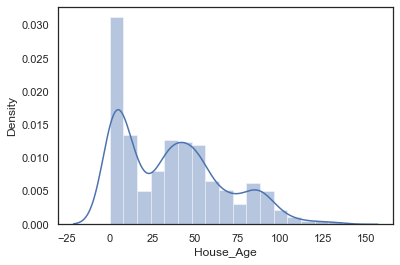

In [53]:
#Lets create a feature with age of house
year_month = ["YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]
hd["House_Age"]=hd["YrSold"]-hd["YearBuilt"]
sns.distplot(hd["House_Age"])
plt.show()

In [54]:
#Lets visualize variation between yearbuilt and House_Age
#plt.figure(figsize=(10,5))
#sns.scatterplot(hd.YearBuilt,hd.House_Age)
#plt.show()

In [55]:
#As `yearbuilt` & `House_Age` are highly corelated it is prudent to drop `YearBuilt` feature

In [56]:
#hd=hd.drop(["YearBuilt"], axis=1)

In [57]:
#year_month.remove("YearBuilt")

In [58]:
# 5.2. Interest Rate
#Lets add US Fed interest rate as a feature. Interest rate determine how much we will have to pay to borrow money to buy
#a property, and they influence the value of real estate. Low interest rates tend to increase demand for property, 
#driving up prices, while high interest rates generally do the opposite.

In [59]:
#lets import interest rate data 
#Source: https://fred.stlouisfed.org/series/FEDFUNDS
#interest_df=pd.read_csv(r"C:\Users\Rohit Chaudhary\Desktop\Upgrad notes\ML2\Assignment\interest rate.csv")
#interest_df.rename(columns={"INTDSRUSM193N":"Interest_rate"}, inplace=True)

In [60]:
#.DATE=pd.to_datetime(interest_df.DATE)
#interest_df["YrSold"]=interest_df.DATE.dt.year
#["MoSold"]=interest_df.DATE.dt.month
#interest_df=interest_df.drop(["DATE"],axis=1)

In [61]:
#plt.figure(figsize=(10,5))
#sns.lineplot(interest_df.YrSold,interest_df.Interest_rate)
#plt.show()

In [62]:
#hd=hd.merge(interest_df, on=["YrSold","MoSold"], how="inner")

In [63]:
#Lets visualize interest rates from 2006 to 2010
#sns.lineplot(hd.YrSold,hd.Interest_rate, color='r')
#plt.xticks(rotation="90")
#plt.show()

In [64]:
# rates has been significantly reduced by Feds from 6% to 1% mainly because of Recession due to Housing bubble.

In [65]:
#Lets visualize impact of interest rate on sale prices
#.figure(figsize=(10,5))
#sns.scatterplot(hd.Interest_rate,hd.SalePrice, hue=hd.YrSold)
#plt.show()

In [66]:
#Lets copy our data into one other variable for tratment later on. 
#Refer notsheet below for Lasso Regression after dropping top 5 variable.
hd_1= hd

### 4.4 Correlation

In [67]:
#Lets check correlation among the data
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]
x=list(hd.columns)
x.remove("SalePrice")
print("Top Absolute Correlations")
print(get_top_abs_correlations(hd[x], 50))


Top Absolute Correlations
MSSubClass_90        BldgType_Duplex          1.000000
Exterior1st_CBlock   Exterior2nd_CBlock       1.000000
YearBuilt            House_Age                0.999036
SaleType_New         SaleCondition_Partial    0.986819
MSSubClass_190       BldgType_2fmCon          0.983395
Exterior1st_VinylSd  Exterior2nd_VinylSd      0.977525
Exterior1st_CemntBd  Exterior2nd_CmentBd      0.974171
Exterior1st_MetalSd  Exterior2nd_MetalSd      0.973065
GarageQual           GarageCond               0.959172
GarageCond           GarageType_No Garage     0.946245
GarageQual           GarageType_No Garage     0.942499
MSSubClass_80        HouseStyle_SLvl          0.942259
RoofStyle_Gable      RoofStyle_Hip            0.933462
MSSubClass_45        HouseStyle_1.5Unf        0.925181
Exterior1st_HdBoard  Exterior2nd_HdBoard      0.883271
GarageCars           GarageArea               0.882475
MSZoning_FV          Neighborhood_Somerst     0.862807
Exterior1st_Wd Sdng  Exterior2nd_Wd Sdn

There are lot of features which are highly corelated. We will drop one of the feature from pair with high collenarity>0.7, Accordingly, dropping following:

`'YrSold','GarageArea','YearBuilt','Exterior2nd_HdBoard','MSZoning_FV','Exterior2nd_WdSdng','TotRmsAbvGrd','HouseStyle_2Story',
'MSZoning_RM','1stFlrSF','MasVnrType_None','HouseStyle_1Story', 'Foundation_CBlock','Exterior2nd_Stucco','BldgType_TwnhsE',
'GarageYrBlt','SaleType_WD','MSSubClass_60','Exterior2nd_Plywood','Heating_GasW','MSSubClass_85','GarageType_Detchd',
'ExterQual','BsmtFinType1','RoofStyle_Shed'`


In [68]:
col_drop=['MSSubClass_90','Exterior2nd_CBlock','YearBuilt','SaleCondition_Partial','BldgType_2fmCon',
        'Exterior2nd_VinylSd','Exterior2nd_CmentBd','Exterior2nd_MetalSd','GarageCond','GarageType_No Garage',
        'HouseStyle_SLvl','RoofStyle_Hip','HouseStyle_1.5Unf','YrSold', 'GarageArea','Exterior2nd_HdBoard',
        'MSZoning_FV','Exterior2nd_Wd Sdng','TotRmsAbvGrd','HouseStyle_2Story','MSZoning_RM','1stFlrSF',
        'MasVnrType_None','HouseStyle_1Story', 'Foundation_CBlock','Exterior2nd_Stucco','BldgType_TwnhsE',
        'GarageYrBlt','SaleType_WD','MSSubClass_60','Exterior2nd_Plywood','Heating_GasW','MSSubClass_85',
        'GarageType_Detchd','ExterQual','BsmtFinType1','RoofStyle_Shed']                                                             

In [69]:
hd=hd.drop(col_drop, axis=1)

In [70]:
#Checking unique values in dataset in order to drop features with single value 
#or 1 unique value as these features will not be helful in prediction
Nil_unique_value_col=[]
for i in hd.columns:
    if len(hd[i].unique())==1:
        Nil_unique_value_col.append(i)
print(Nil_unique_value_col)

['LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [71]:
#Dropping these features as they are making any value addition
hd=hd.drop(Nil_unique_value_col, axis=1)

# 6. Model Development-Validation and Evaluaiton

In [72]:
#As we have been provided with only train dataset, test_train split shall not be required in instant case.

In [73]:
#We need to scale the data in order to interpret data and to expedite the process of gradient descent
#Remaining numeric features which require scaling 
vars_scale=ordinal+numeric+year_month +['House_Age','SalePrice',]#,'Interest_rate',
for i in (Nil_unique_value_col + ['ExterQual', 'GarageYrBlt','YearBuilt', 'BsmtFinType1','1stFlrSF', 
                                'TotRmsAbvGrd','GarageArea', 'GarageCond', 'YrSold']):
    vars_scale.remove(i)

In [74]:
#Lets perform normalization on the numeric data
from sklearn.preprocessing import MinMaxScaler
#Creating scaler object
scaler=MinMaxScaler()
# Now normalization needs to be performed on all the numeric and label encoded varaibles
hd[vars_scale]=scaler.fit_transform(hd[vars_scale])

In [75]:
hd.head()

,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,GarageFinish,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_RH,MSZoning_RL,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_Duplex,BldgType_Twnhs,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_SFoyer,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Mansard,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_ImStucc,Exterior2nd_Other,Exterior2nd_Stone,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,House_Age
0,0.287582,0.263311,1.000000,0.666667,0.500,0.883333,0.234030,0.5,0.8,0.75,0.25,0.265040,0.166667,0.0,0.064212,0.280642,0.413559,0.372521,0.4,0.666667,0.5,0.428571,1.0,0.0,0.666667,0.50,0.6,0.000000,0.187692,0.000000,0.090909,0.581431,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.036765
1,0.385621,0.305661,1.000000,0.555556,0.875,0.433333,0.000000,0.5,0.8,0.75,1.00,0.367152,0.166667,0.0,0.121575,0.413750,0.000000,0.251235,0.0,0.666667,0.0,0.428571,0.5,0.4,0.666667,0.50,0.6,0.454962,0.000000,0.000000,0.363636,0.536319,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.227941
2,0.307190,0.366425,0.666667,0.666667,0.500,0.866667,0.193433,0.5,0.8,0.75,0.50,0.182450,0.166667,0.0,0.185788,0.301625,0.419370,0.393096,0.4,0.666667,0.5,0.428571,1.0,0.4,0.66

In [76]:
#Defining X & Y for Regression
X_train=hd.drop(["SalePrice"], axis=1)
y_train=(hd["SalePrice"])

In [77]:
X_train.shape

(1460, 173)

## 6.1 Linear Regression

#### 6.1.1 Hyperparameter tunning to find out best no. of features in model using Grid searchCV and rfe as estimator

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
lr=LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
lr.fit(X_train, y_train)
rfe=RFE(lr)
#As we don't want model to be complex checking behaviour of model upto 50 features
hyper_params=[{'n_features_to_select':list(range(1,51))}] 
cv_model=GridSearchCV(estimator=rfe,
                      param_grid=hyper_params,
                      scoring="r2",
                      cv=folds,
                      verbose=1,
                      return_train_score=True)
cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [79]:
cv_resuls=pd.DataFrame(cv_model.cv_results_)

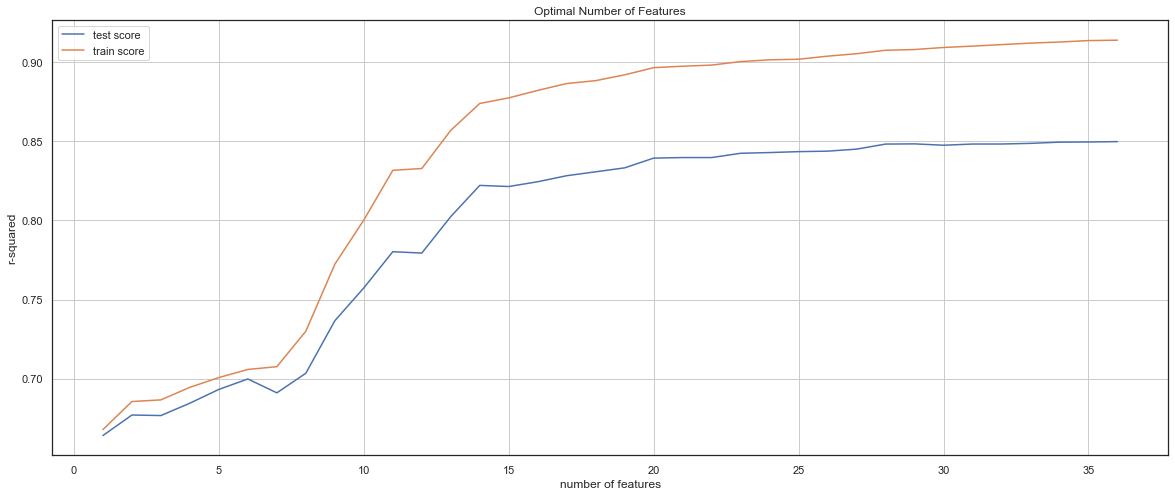

In [80]:
#lets plot mean test and train score to calculate ideal no. of features
cv_plot = cv_resuls[cv_resuls['param_n_features_to_select']<=36]
plt.figure(figsize=(20,8))
plt.plot(cv_plot["param_n_features_to_select"],cv_plot["mean_test_score"])
plt.plot(cv_plot["param_n_features_to_select"],cv_plot["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.grid()
plt.show()

As seen above around 30 no. of features r squared is maximum for train and test through cross validation after that test score is constant and also it is seen that after 35 no. of variables test r squared is highle unstable.

#### 6.1.2 Linear regression with 30 no. of features using RFE

In [81]:
#Linear Regression Object
lr=LinearRegression()
rfe=RFE(lr,30)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=30)

In [82]:
#Top 30 no. of features in regression modeL
rfe_df=pd.DataFrame()
rfe_df["features"]=X_train.columns
rfe_df["Selected"]=rfe.support_
rfe_df["Ranking"]=rfe.ranking_
features=list(rfe_df[rfe_df["Ranking"]==1]["features"].values)

In [83]:
#Linear Regression using these top 30 features
lr=LinearRegression()
lr.fit(X_train[features], y_train)

LinearRegression()

#### 6.1.3 Predictions and Residual Analysis

In [84]:
#Lets verify assumptions of Linear Regression on residuals
y_train_pred=lr.predict(X_train[features])

In [85]:
#Residuals 
res_train=y_train_pred-y_train

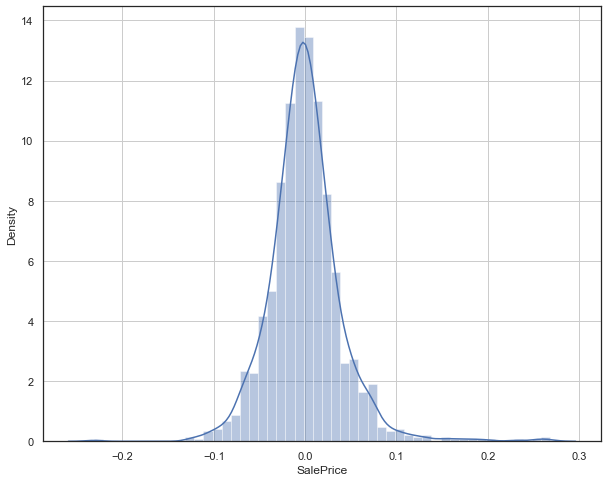

In [86]:
#Lets check residuals distribution
plt.figure(figsize=(10,8))
sns.distplot(res_train)
plt.grid()
plt.show()

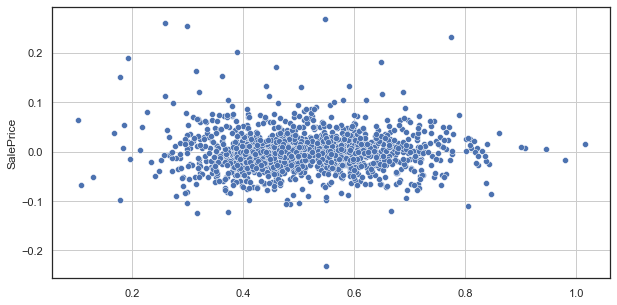

In [87]:
#Checking Homoscedasticity
plt.figure(figsize=(10,5))
sns.scatterplot(y_train_pred, res_train)
plt.grid()
plt.show()

In [88]:
#Coefficients in model
Lin_reg_coeff=pd.DataFrame({"Feature":X_train[features].columns, "coeff":lr.coef_ })
Lin_reg_coeff.sort_values(by="coeff", key=abs, ascending =False, inplace =True)
Lin_reg_coeff

,Feature,coeff
17,RoofMatl_Metal,0.588850
21,RoofMatl_WdShngl,0.572392
16,RoofMatl_Membran,0.567841
19,RoofMatl_Tar&Grv,0.562821
15,RoofMatl_CompShg,0.550551
20,RoofMatl_WdShake,0.528863
18,RoofMatl_Roll,0.522140
5,GrLivArea,0.322845
14,Condition2_PosN,-0.278802
1,OverallQual,0.231466


In [89]:
pip install RegscorePy

Note: you may need to restart the kernel to use updated packages.


In [90]:
#Checking r2 score and mean_squared_error on  train data after Linear Regression
from RegscorePy import *
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
def get_evaluation_metrics(true,predicted,Regression, features):
    Evaluation_metric=pd.DataFrame({"R_squared_score": round(r2_score(true, predicted),3),
                                    "Adjusted R2 score" :round(1 - (1-r2_score(true, predicted))*((1460-1)/(1460-features-1)),3),
                                    "Mean absolute error":round(mean_absolute_error(true, predicted),5),
                                    "Mean Squared error":round(mean_squared_error(true, predicted),5),
                                    "AIC" : round(aic.aic(true, predicted, features),2),
                                    "BIC" : round(bic.bic(true, predicted, features),2),
                                   "Features":features}, index=[Regression])
    print("Evaluation metrics are as under:")
    return Evaluation_metric
Linear_regression_metrics=get_evaluation_metrics(y_train,y_train_pred, "Linear_regression",len(features))
Linear_regression_metrics

Evaluation metrics are as under:


,R_squared_score,Adjusted R2 score,Mean absolute error,Mean Squared error,AIC,BIC,Features
Linear_regression,0.905,0.903,0.02793,0.0016,-9338.97,-9180.38,30


## 6.2 Ridge Regression

In Ridge regression additional penalty of lambda times sum of all the sum of sqaure of errors is added to cost function.
- Firstly we we will calculate best value of lambda using Grid Search CV
- Then using this lambda model will be tunned and predictions evaluation shall be made

#### 6.2.1 Ridge Regression with GridSearchCV for hypertunning alpha parameter

In [91]:
from sklearn.linear_model import Ridge
folds=5
ridge=Ridge()
score_params=["r2","neg_mean_absolute_error","neg_mean_squared_error"]
parmas={"alpha":[0,0.001,0.01,0.1,1,2,3,4,5,6,7,8,9,10,100,1000]}
for score in score_params:
    model_cv=GridSearchCV(estimator=ridge,
                         param_grid =parmas,
                         scoring=score,
                         cv=folds,
                         verbose=1,
                         return_train_score=True)
    model_cv.fit(X_train, y_train)
    print("Considering ", score , "as parameter ",model_cv.best_params_ )

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Considering  r2 as parameter  {'alpha': 3}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Considering  neg_mean_absolute_error as parameter  {'alpha': 2}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Considering  neg_mean_squared_error as parameter  {'alpha': 3}


In [92]:
#Regression model using alpha as 3
ridge=Ridge(3)
ridge.fit(X_train, y_train)

Ridge(alpha=3)

#### 6.2.2 Predictions and Residual Analysis

In [93]:
#Coeffecient of Ridge Regression
y_train_pred=ridge.predict(X_train)
Coeff_ridge=pd.DataFrame({"Feature":X_train.columns, "coeff_ridge":ridge.coef_ })
Coeff_ridge.sort_values(by="coeff_ridge", key=abs,ascending =False, inplace =True)
Coeff_ridge

,Feature,coeff_ridge
17,GrLivArea,0.157917
3,OverallQual,0.135007
15,TotalBsmtSF,0.086419
4,OverallCond,0.083885
90,Condition2_PosN,-0.069900
25,GarageCars,0.060492
11,BsmtFinSF1,0.055518
108,RoofMatl_WdShngl,0.054415
76,Neighborhood_StoneBr,0.048400
1,LotArea,0.046167


In [94]:
#Checking r2 score and mean_squared_error on tet and train data after Ridge Regression
Ridge_metrics=get_evaluation_metrics(y_train,y_train_pred,"Ridge_Regression",X_train.shape[1] )
Ridge_metrics

Evaluation metrics are as under:


,R_squared_score,Adjusted R2 score,Mean absolute error,Mean Squared error,AIC,BIC,Features
Ridge_Regression,0.92,0.91,0.02446,0.00134,-9307.62,-8393.11,173


In [95]:
#Residuals
res_train=y_train_pred-y_train

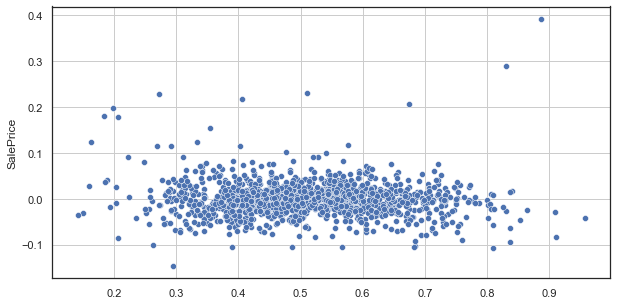

In [96]:
plt.figure(figsize=(10,5))
sns.scatterplot(y_train_pred,res_train)
plt.grid()
plt.show()

In [97]:
#plt.figure(figsize=(20,20))
#sns.scatterplot(hd.index,y_train, color='r')
#sns.scatterplot(hd.index,y_train_pred,color='b')
#plt.show()

## 6.3 Lasso Regression

In Lasso regression additional penalty of lambda times sum of all the sum of absolute errors is added to cost function. As compared to Ridge Regression lasso regression also helps in feature elimination. As seen above in ridge regression there are many models, in order to predict which features are affected Sale price of houses.

- Firstly we we will calculate best value of lambda using Grid Search CV.
- Using this lambda model will be tunned and predictions evaluation shall be made.

#### 6.3.1 Lasso Regression with GridSearchCV for hypertunning alpha parameter

In [98]:
from sklearn.linear_model import Lasso
folds=5
lasso=Lasso()
score_params=["r2","neg_mean_absolute_error","neg_mean_squared_error"]
parmas={"alpha":[0,0.005,0.006,0.007,0.0008,0.0009,0.001,0.0011,0.0015,0.01,0.1,1,10]}
for score in score_params:
    model_cv=GridSearchCV(estimator=lasso,
                         param_grid =parmas,
                         scoring=score,
                         cv=folds,
                         verbose=1,
                         return_train_score=True)
    model_cv.fit(X_train, y_train)
    print("Considering ",score , "as parameter ",model_cv.best_params_)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
Considering  r2 as parameter  {'alpha': 0.0008}
Fitting 5 folds for each of 13 candidates, totalling 65 fits
Considering  neg_mean_absolute_error as parameter  {'alpha': 0}
Fitting 5 folds for each of 13 candidates, totalling 65 fits
Considering  neg_mean_squared_error as parameter  {'alpha': 0.0008}


In [99]:
#Lasso object 
lasso=Lasso(0.0008)
#fitting
lasso.fit(X_train, y_train)

Lasso(alpha=0.0008)

#### 6.3.2 Predictions and Residual Analysis

In [100]:
#Coeffecients
y_train_pred=lasso.predict(X_train)
lasso_df=pd.DataFrame({"Feature":X_train.columns, "coeff_lasso":lasso.coef_ })
lasso_df.sort_values(by="coeff_lasso",key=abs, ascending =False, inplace =True)
lasso_df[lasso_df["coeff_lasso"]!=0]

,Feature,coeff_lasso
17,GrLivArea,0.258922
3,OverallQual,0.191683
25,GarageCars,0.071575
15,TotalBsmtSF,0.058920
11,BsmtFinSF1,0.044829
4,OverallCond,0.038267
1,LotArea,0.035843
23,Fireplaces,0.031806
5,YearRemodAdd,0.029815
43,MSZoning_RL,0.026369


In [101]:
#no. of features after Lasso Regression
len(lasso_df[lasso_df["coeff_lasso"]!=0])

38

So after Lasso Regression we are left with only 38 features from 173 no. of total features.

In [102]:
#Checking r2 score and mean_squared_error on tet and train data after Lasso Regression
Lasso_metrics=get_evaluation_metrics(y_train,y_train_pred,"Lasso_Regression",len(lasso_df[lasso_df["coeff_lasso"]!=0]))
Lasso_metrics

Evaluation metrics are as under:


,R_squared_score,Adjusted R2 score,Mean absolute error,Mean Squared error,AIC,BIC,Features
Lasso_Regression,0.889,0.886,0.02921,0.00187,-9095.83,-8894.96,38


In [103]:
#residuals
res_train=y_train_pred-y_train

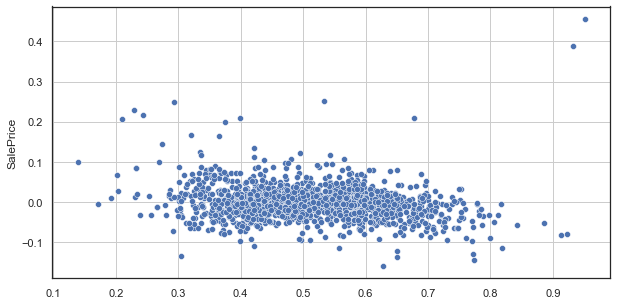

In [104]:
#variance of residuals
plt.figure(figsize=(10,5))
sns.scatterplot(y_train_pred,res_train)
plt.grid()
plt.show()

## 6.4 ElasticNet Regression

In Elasticnet regression is a balanced regression technique which comprises of both ridge and lasso regession

- Firstly we we will calculate best value of lambda using Grid Search CV.
- Using this lambda model will be tunned and predictions evaluation shall be made.

In [105]:
from sklearn.linear_model import ElasticNet
#folds
folds=5
params_grid=({'alpha': [0,0.0001, 0.0002,0000.3,0.0004,0.0005,0.0006, 0.0007,0.0008,0.0009,0.001,0.01,0.1,10,100, 1000]})

elastic=ElasticNet()
scoring_para=["r2","neg_mean_squared_error","neg_mean_absolute_error"]
for score in scoring_para:
    cv_model=GridSearchCV(estimator=elastic,
                         cv=folds,
                         scoring=score,
                         param_grid=params_grid,
                         verbose=1,
                         return_train_score=True)
    cv_model.fit(X_train,y_train)
    print("Considering ",score , "as parameter ",model_cv.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Considering  r2 as parameter  {'alpha': 0.0008}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Considering  neg_mean_squared_error as parameter  {'alpha': 0.0008}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Considering  neg_mean_absolute_error as parameter  {'alpha': 0.0008}


In [106]:
#modelling using alpha as 0.0008
elastic=ElasticNet(0.0008)
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.0008)

In [107]:
y_train_pred=elastic.predict(X_train)
elastic_df=pd.DataFrame({"Feature":X_train.columns, "coeff_elastic":elastic.coef_ })
elastic_df.sort_values(by="coeff_elastic", key=abs, ascending =False, inplace =True)
elastic_df[elastic_df["coeff_elastic"]!=0]

,Feature,coeff_elastic
17,GrLivArea,0.246767
3,OverallQual,0.175425
15,TotalBsmtSF,0.071613
25,GarageCars,0.071263
4,OverallCond,0.071110
11,BsmtFinSF1,0.045367
1,LotArea,0.042784
75,Neighborhood_Somerst,0.031061
23,Fireplaces,0.029563
70,Neighborhood_NridgHt,0.028749


In [108]:
elastic_df[elastic_df["coeff_elastic"]!=0].shape[0]

51

So in using Elastic net Regression we are left with 53 no. of features

In [109]:
Elastic_metrics=get_evaluation_metrics(y_train,y_train_pred,"Elastic_Regression",elastic_df[elastic_df["coeff_elastic"]!=0].shape[0])
Elastic_metrics

Evaluation metrics are as under:


,R_squared_score,Adjusted R2 score,Mean absolute error,Mean Squared error,AIC,BIC,Features
Elastic_Regression,0.904,0.9,0.02673,0.00163,-9274.39,-9004.79,51


In [110]:
#Comaprison of evaluation metrics
Comp_df=pd.concat([Ridge_metrics,Lasso_metrics, Linear_regression_metrics,Elastic_metrics])
Comp_df.head()

,R_squared_score,Adjusted R2 score,Mean absolute error,Mean Squared error,AIC,BIC,Features
Ridge_Regression,0.920,0.910,0.02446,0.00134,-9307.62,-8393.11,173
Lasso_Regression,0.889,0.886,0.02921,0.00187,-9095.83,-8894.96,38
Linear_regression,0.905,0.903,0.02793,0.00160,-9338.97,-9180.38,30
Elastic_Regression,0.904,0.900,0.02673,0.00163,-9274.39,-9004.79,51


#### From above it is observed that:
- As per R2 score:  `Ridge_Regression>Linear_reg>Elastic_Regression>Lasso_Regression`
- As per Mean absolute error : `Ridge_Regression>Linear_reg>Elastic_Regression>Lasso_Regression`
- As per Mean Squared error : `Ridge_Regression>Linear_reg>Elastic_Regression>Lasso_Regression`
- As per AIC  : `Lasso_Regression>Elastic_Regression>Ridge_Regression>Linear_reg`
- As per BIC  : `Ridge_Regression>Lasso_Regression>Elastic_Regression>Linear_reg`    
- No. of features: `Lasso_Regression>Linear_reg>Elastic_Regression>Ridge_Regression`

From above, Ridge Regression is performing slightly better compared to other models in terms of BIC, AIC, adjusted R2 score.

In [111]:
#Lets check out top ten coefficent in all the models 
top_ten_elastic_coeff=elastic_df[elastic_df["coeff_elastic"]!=0].head(10).reset_index().drop(["index"], axis=1)
top_ten_lasso_coeff=lasso_df[lasso_df["coeff_lasso"]!=0].head(10).reset_index().drop(["index"], axis=1)
top_ten_ridge_coeff=Coeff_ridge[Coeff_ridge["coeff_ridge"]!=0].head(10).reset_index().drop(["index"], axis=1)
top_ten_linear_coeff=Lin_reg_coeff[Lin_reg_coeff["coeff"]!=0].head(10).reset_index().drop(["index"], axis=1)

In [112]:
comp_coeff=pd.concat([top_ten_elastic_coeff,top_ten_lasso_coeff,top_ten_ridge_coeff,top_ten_linear_coeff], axis=1)
comp_coeff

,Feature,coeff_elastic,Feature,coeff_lasso,Feature,coeff_ridge,Feature,coeff
0,GrLivArea,0.246767,GrLivArea,0.258922,GrLivArea,0.157917,RoofMatl_Metal,0.588850
1,OverallQual,0.175425,OverallQual,0.191683,OverallQual,0.135007,RoofMatl_WdShngl,0.572392
2,TotalBsmtSF,0.071613,GarageCars,0.071575,TotalBsmtSF,0.086419,RoofMatl_Membran,0.567841
3,GarageCars,0.071263,TotalBsmtSF,0.058920,OverallCond,0.083885,RoofMatl_Tar&Grv,0.562821
4,OverallCond,0.071110,BsmtFinSF1,0.044829,Condition2_PosN,-0.069900,RoofMatl_CompShg,0.550551
5,BsmtFinSF1,0.045367,OverallCond,0.038267,GarageCars,0.060492,RoofMatl_WdShake,0.528863
6,LotArea,0.042784,LotArea,0.035843,BsmtFinSF1,0.055518,RoofMatl_Roll,0.522140
7,Neighborhood_Somerst,0.031061,Fireplaces,0.031806,RoofMatl_WdShngl,0.054415,GrLivArea,0.322845
8,Fireplaces,0.029563,YearRemodAdd,0.029815,Neighborhood_StoneBr,0.048400,Condition2_PosN,-0.278802
9,Neighborhood_NridgHt,0.028749,MSZoning_RL,0.026369,LotArea,0.046167,OverallQual,0.231466


As seen above, there are few features which are common in almost all the models above like `GrLivArea, GarageArea, Fireplaces,OverallQual` , but as seen above as there is high collinearity among the features and also few features are having high p values.So we have to manully eliminate features.

### 6.5 Lets evaluate changes in the model if we choose double the value of alpha for both ridge and lasso

#### 6.5.1 Ridge Regression with alpha=6

In [113]:
#Regression model using alpha as 6 i.e. double of optimum
ridge=Ridge(6)
ridge.fit(X_train, y_train)

#Coeffecient of Ridge Regression
y_train_pred=ridge.predict(X_train)
Coeff_ridge=pd.DataFrame({"Feature":X_train.columns, "coeff_ridge":ridge.coef_ })
Coeff_ridge.sort_values(by="coeff_ridge",key=abs, ascending =False, inplace =True)
Coeff_ridge

,Feature,coeff_ridge
17,GrLivArea,0.125567
3,OverallQual,0.120018
15,TotalBsmtSF,0.077740
4,OverallCond,0.071363
25,GarageCars,0.059990
11,BsmtFinSF1,0.057454
19,FullBath,0.046712
76,Neighborhood_StoneBr,0.044979
1,LotArea,0.044254
90,Condition2_PosN,-0.041920


In [114]:
#Checking r2 score and mean_squared_error on tet and train data after Ridge Regression
Ridge_metrics_alpha_double=get_evaluation_metrics(y_train,y_train_pred,"Ridge_Regression_double_alpha",X_train.shape[1] )
Ridge_metrics_alpha_double

Evaluation metrics are as under:


,R_squared_score,Adjusted R2 score,Mean absolute error,Mean Squared error,AIC,BIC,Features
Ridge_Regression_double_alpha,0.916,0.904,0.02525,0.00143,-9222.18,-8307.67,173


#### 6.5.2 Lasso Regression with alpha=0.0008 x 2= 0.0016

In [115]:
#Lasso object 
lasso=Lasso(0.0016)
#fitting
lasso.fit(X_train, y_train)
#Coeffecients
y_train_pred=lasso.predict(X_train)
lasso_double_alpha=pd.DataFrame({"Feature":X_train.columns, "coeff_lasso":lasso.coef_ })
lasso_double_alpha.sort_values(by="coeff_lasso",key=abs, ascending =False, inplace =True)
lasso_double_alpha[lasso_df["coeff_lasso"]!=0]

,Feature,coeff_lasso
17,GrLivArea,0.220780
3,OverallQual,0.198862
25,GarageCars,0.072423
15,TotalBsmtSF,0.043066
5,YearRemodAdd,0.040160
23,Fireplaces,0.038182
11,BsmtFinSF1,0.036720
22,KitchenQual,0.027531
43,MSZoning_RL,0.025107
1,LotArea,0.022138


In [116]:
#Checking r2 score and mean_squared_error on tet and train data after Lasso Regression
Lasso_metrics_alpha_double=get_evaluation_metrics(y_train,y_train_pred,"Lasso_Regression_double_alpha",len(lasso_double_alpha[lasso_df["coeff_lasso"]!=0]))
Lasso_metrics_alpha_double

Evaluation metrics are as under:


,R_squared_score,Adjusted R2 score,Mean absolute error,Mean Squared error,AIC,BIC,Features
Lasso_Regression_double_alpha,0.859,0.856,0.03418,0.00237,-8747.61,-8546.73,38


In [117]:
#Comaprison of evaluation metrics aftre doubling alpha with earlier alpha
Comp_double_alpha=pd.concat([Ridge_metrics,Ridge_metrics_alpha_double, Lasso_metrics,Lasso_metrics_alpha_double])
Comp_double_alpha

,R_squared_score,Adjusted R2 score,Mean absolute error,Mean Squared error,AIC,BIC,Features
Ridge_Regression,0.920,0.910,0.02446,0.00134,-9307.62,-8393.11,173
Ridge_Regression_double_alpha,0.916,0.904,0.02525,0.00143,-9222.18,-8307.67,173
Lasso_Regression,0.889,0.886,0.02921,0.00187,-9095.83,-8894.96,38
Lasso_Regression_double_alpha,0.859,0.856,0.03418,0.00237,-8747.61,-8546.73,38


- In terms of  R2 score, AIC & BIC Ridge Regression is performing much better after doubling alpha compared to Lasso Regression, so it is better to choose Ridge Regression model in instant case for the purpose of prediction. 
- As we know, In Ridge, when we increase the value of alpha, the most important features may shrink a little bit and the less important feature stay at high value. However, with LASSO when we increase the value of alpha the most important features shrink a little bit and the coefficents of less important features is zerod. Thus, LASSO is able to exclude non important features from the model.Thus, Lasso is able to exclude non important features from the model. Hence, Lasso regression also helps in feature elimination.

## 6.5 Modeling considring five most important predictor variables in the lasso model are not available in the incoming data


As Seen above five most important predictor variables in the lasso model are `'GrLivArea','OverallQual','GarageCars','TotalBsmtSF','BsmtFinSF1'`

In [118]:
#Lets remove these features from input data stored as `hd_1` above

In [119]:
hd_1=hd_1.drop(['GrLivArea','OverallQual','GarageCars','TotalBsmtSF','BsmtFinSF1'], axis=1)

In [120]:
hd_1=hd_1.drop(col_drop, axis=1)

In [121]:
#Checking unique values in dataset in order to drop features with single value 
#or 1 unique value as these features will not be helful in prediction
Nil_unique_value_col=[]
for i in hd_1.columns:
    if len(hd_1[i].unique())==1:
        Nil_unique_value_col.append(i)
print(Nil_unique_value_col)

['LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [122]:
#Dropping these features as they are making any value addition
hd_1=hd_1.drop(Nil_unique_value_col, axis=1)

In [123]:
#We need to scale the data in order to interpret data and to expedite the process of gradient descent
#Remaining numeric features which require scaling 
vars_scale=ordinal+numeric+year_month +['House_Age','SalePrice',]
for i in (Nil_unique_value_col + ['ExterQual', 'BsmtFinType1', 'GarageCond', '1stFlrSF', 'TotRmsAbvGrd', 'GarageArea',
                                  'GarageYrBlt', 'YrSold','YearBuilt','GrLivArea','OverallQual','GarageCars','TotalBsmtSF',
                                  'BsmtFinSF1']):
    vars_scale.remove(i)

In [124]:
#Lets perform normalization on the numeric data
#Creating scaler object
scaler=MinMaxScaler()
# Now normalization needs to be performed on all the numeric and label encoded varaibles
hd_1[vars_scale]=scaler.fit_transform(hd_1[vars_scale])

In [125]:
#Defining X & Y for Regression
X_train_1=hd_1.drop(["SalePrice"], axis=1)
y_train_1=(hd_1["SalePrice"])

In [126]:
#Lasso Regression with GridSearchCV for hypertunning alpha parameter
folds=5
lasso=Lasso()
score_params=["r2","neg_mean_absolute_error","neg_mean_squared_error"]
parmas={"alpha":[0,0.005,0.006,0.007,0.0008,0.0009,0.001,0.0011,0.0015,0.01,0.1,1,10]}
for score in score_params:
    model_cv=GridSearchCV(estimator=lasso,
                         param_grid =parmas,
                         scoring=score,
                         cv=folds,
                         verbose=1,
                         return_train_score=True)
    model_cv.fit(X_train_1, y_train_1)
    print("Considering ",score , "as parameter ",model_cv.best_params_)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
Considering  r2 as parameter  {'alpha': 0.0008}
Fitting 5 folds for each of 13 candidates, totalling 65 fits
Considering  neg_mean_absolute_error as parameter  {'alpha': 0}
Fitting 5 folds for each of 13 candidates, totalling 65 fits
Considering  neg_mean_squared_error as parameter  {'alpha': 0.0008}


In [127]:
#Lasso object 
lasso=Lasso(0.0008)
#fitting
lasso.fit(X_train_1, y_train_1)

Lasso(alpha=0.0008)

In [128]:
#Coeffecients
y_train_pred_1=lasso.predict(X_train_1)
lasso_df_1=pd.DataFrame({"Feature":X_train_1.columns, "coeff_lasso":lasso.coef_ })
lasso_df_1.sort_values(by="coeff_lasso",key=abs, ascending =False, inplace =True)
lasso_df_2=lasso_df_1[lasso_df_1["coeff_lasso"]!=0]
lasso_df_2.head(10)

,Feature,coeff_lasso
15,FullBath,0.112508
1,LotArea,0.089396
7,BsmtQual,0.072420
19,Fireplaces,0.072226
18,KitchenQual,0.049420
13,2ndFlrSF,0.049199
65,Neighborhood_NridgHt,0.042952
3,OverallCond,0.038233
14,BsmtFullBath,0.037335
5,MasVnrArea,0.036338


In [129]:
#Checking r2 score and mean_squared_error on tet and train data after Lasso Regression
Lasso_metrics=get_evaluation_metrics(y_train_1,y_train_pred_1,"Lasso_Regression_top_five_coeff_droped",
                                     len(lasso_df_1[lasso_df_1["coeff_lasso"]!=0]))
Lasso_metrics

Evaluation metrics are as under:


,R_squared_score,Adjusted R2 score,Mean absolute error,Mean Squared error,AIC,BIC,Features
Lasso_Regression_top_five_coeff_droped,0.837,0.832,0.03753,0.00274,-8519.57,-8276.4,46


In [130]:
print("As seen from above top Five important predictor variables if five most important predictor variables in the original lasso model are not available in the incoming data are: ",
      list(lasso_df_2["Feature"])[0:5])

As seen from above top Five important predictor variables if five most important predictor variables in the original lasso model are not available in the incoming data are:  ['FullBath', 'LotArea', 'BsmtQual', 'Fireplaces', 'KitchenQual']


## 7. Interpretation of Model Features

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Now in order to find out which variables are affecting sale price maximum we have to check how much sale priec vary upon unit change in one independent feature, keeping all other features constant. For this to happen multicollineariry has to be minimum. As in multicollinearity predictor variables are ofen dependent on other variables.

Now if we check best predictor model which was Ridge Regression, let us check multicollenarity on that model by checking VIF.

In [131]:
#For VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(X):
    vif_df=pd.DataFrame()
    vif_df["features"]= X.columns
    vif_df["vif"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
    vif_df["vif"]=round(vif_df["vif"],2)
    vif_df.sort_values("vif", ascending =False, inplace=True )
    return vif_df
#Top ten variables of Ridge Regression
Col_check_features=list(top_ten_ridge_coeff["Feature"])
VIF(X_train[Col_check_features])

,features,vif
1,OverallQual,29.71
2,TotalBsmtSF,13.73
0,GrLivArea,11.69
5,GarageCars,11.32
3,OverallCond,8.54
9,LotArea,6.31
6,BsmtFinSF1,2.69
8,Neighborhood_StoneBr,1.07
4,Condition2_PosN,1.03
7,RoofMatl_WdShngl,1.03


- As we can see above, there are multiple features with High VIF values in top 10 features from ridge regression which indead  refers to high multicollinearity. Thus we cannot be sure whether Saleprice is dependent on only these top features as these features are highly dependent on each other.
Also we need to check p vales for these features to ascertain whether features are signifiacnt or not. Now in lasso/ridge Regression additional penalty is introduced to Cost function in order to reduce variance in model against slight increase in bias of model. As such lasso/ridge models cannot be used to see which variable is imapcting the sale price maximum.
- In order to quantify the relative impact of the features, we have to check the response only on features using traditional linear regression. Therafter we will drop features stepwise based on p value more than 5 and VIF>5 in order to come to features which are effecting Sales price maximum. 

Reference:https://stats.stackexchange.com/questions/249283/top-variables-from-lasso-not-significant-in-regular-regression

In [132]:
#Lets buid Linear Regression based on 30 variabes as evaluated above 
#As there are 30 no. of features, we will also check p value & VIF

#For checking p values and overall fit

import statsmodels.api as sm
def OLS_model(X,y):
    X_train_sm =sm.add_constant(X)
    global lm
    lm=sm.OLS(y,X_train_sm).fit()
    return lm.summary()
#For VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(X):
    vif_df=pd.DataFrame()
    vif_df["features"]= X.columns
    vif_df["vif"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
    vif_df["vif"]=round(vif_df["vif"],2)
    vif_df.sort_values("vif", ascending =False, inplace=True )
    return vif_df

print(OLS_model(X_train[features], y_train))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     454.6
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:55:46   Log-Likelihood:                 2627.8
No. Observations:                1460   AIC:                            -5194.
Df Residuals:                    1429   BIC:                            -5030.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4721 

As 'Condition2_PosA' is having high p values let us drop this feature.

In [133]:
#Dropping feature with high p value
features.remove('Condition2_PosA')

In [134]:
#printING Regression model summary and VIF
print(OLS_model(X_train[features], y_train))
VIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     470.3
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:55:46   Log-Likelihood:                 2627.3
No. Observations:                1460   AIC:                            -5195.
Df Residuals:                    1430   BIC:                            -5036.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4734 

,features,vif
14,RoofMatl_CompShg,241.66
8,Street_Pave,217.53
1,OverallQual,44.35
2,OverallCond,23.56
4,TotalBsmtSF,14.28
5,GrLivArea,13.28
6,GarageCars,12.93
0,LotArea,7.75
28,House_Age,5.62
3,BsmtUnfSF,3.49


As 'Exterior2nd_Brk Cmn' is alos having high p values let us drop this feature. 

In [135]:
#Dropping feature with high p value
features.remove('Exterior2nd_Brk Cmn')
#printING Regression model summary and VIF
print(OLS_model(X_train[features], y_train))
VIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     486.6
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:55:46   Log-Likelihood:                 2626.3
No. Observations:                1460   AIC:                            -5195.
Df Residuals:                    1431   BIC:                            -5041.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4740 

,features,vif
14,RoofMatl_CompShg,241.61
8,Street_Pave,217.53
1,OverallQual,44.34
2,OverallCond,23.56
4,TotalBsmtSF,14.25
5,GrLivArea,13.28
6,GarageCars,12.89
0,LotArea,7.74
27,House_Age,5.61
3,BsmtUnfSF,3.49


Now all the variables are significant as p value is less that 5, however 'RoofMatl_CompShg' is having very high VIF, therfore dopping

In [136]:
#Dropping feature with high vif
features.remove('RoofMatl_CompShg')
#printING Regression model summary and VIF
print(OLS_model(X_train[features], y_train))
VIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     443.5
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:55:47   Log-Likelihood:                 2541.1
No. Observations:                1460   AIC:                            -5026.
Df Residuals:                    1432   BIC:                            -4878.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0843 

,features,vif
8,Street_Pave,45.50
1,OverallQual,43.21
2,OverallCond,23.15
4,TotalBsmtSF,14.23
5,GrLivArea,12.93
6,GarageCars,12.57
0,LotArea,7.56
26,House_Age,5.37
3,BsmtUnfSF,3.49
10,Neighborhood_NridgHt,1.29


Suddenly after removal of RoofMatl_CompShg feature a lot of other features ahs become insignificant. Let us drop one by one first `'RoofMatl_Membran'` 

In [137]:
#Dropping feature with high p value
features.remove('RoofMatl_Membran')
#printING Regression model summary and VIF
print(OLS_model(X_train[features], y_train))
VIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     460.8
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:55:47   Log-Likelihood:                 2540.9
No. Observations:                1460   AIC:                            -5028.
Df Residuals:                    1433   BIC:                            -4885.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0838 

,features,vif
8,Street_Pave,45.36
1,OverallQual,43.13
2,OverallCond,23.14
4,TotalBsmtSF,14.22
5,GrLivArea,12.87
6,GarageCars,12.57
0,LotArea,7.44
25,House_Age,5.37
3,BsmtUnfSF,3.49
10,Neighborhood_NridgHt,1.29


Let us drop 'RoofMatl_Roll' due to high p value

In [138]:
#Dropping feature with high p value
features.remove('RoofMatl_Roll')
#printING Regression model summary and VIF
print(OLS_model(X_train[features], y_train))
VIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     479.4
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:55:47   Log-Likelihood:                 2540.7
No. Observations:                1460   AIC:                            -5029.
Df Residuals:                    1434   BIC:                            -4892.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0838 

,features,vif
8,Street_Pave,45.35
1,OverallQual,43.09
2,OverallCond,23.14
4,TotalBsmtSF,14.22
5,GrLivArea,12.86
6,GarageCars,12.56
0,LotArea,7.44
24,House_Age,5.37
3,BsmtUnfSF,3.49
10,Neighborhood_NridgHt,1.29


Dropping 'RoofMatl_WdShake'

In [139]:
#Dropping feature with high p value
features.remove('RoofMatl_WdShake')
#printING Regression model summary and VIF
print(OLS_model(X_train[features], y_train))
VIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     499.4
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:55:47   Log-Likelihood:                 2540.3
No. Observations:                1460   AIC:                            -5031.
Df Residuals:                    1435   BIC:                            -4898.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0843 

,features,vif
8,Street_Pave,45.22
1,OverallQual,43.05
2,OverallCond,23.12
4,TotalBsmtSF,14.22
5,GrLivArea,12.83
6,GarageCars,12.54
0,LotArea,7.42
23,House_Age,5.37
3,BsmtUnfSF,3.49
10,Neighborhood_NridgHt,1.29


Dropping RoofMatl_Metal

In [140]:
#Dropping feature with high p value
features.remove('RoofMatl_Metal')
#printING Regression model summary and VIF
print(OLS_model(X_train[features], y_train))
VIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     521.1
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:55:47   Log-Likelihood:                 2539.8
No. Observations:                1460   AIC:                            -5032.
Df Residuals:                    1436   BIC:                            -4905.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0839 

,features,vif
8,Street_Pave,45.22
1,OverallQual,43.01
2,OverallCond,23.10
4,TotalBsmtSF,14.22
5,GrLivArea,12.78
6,GarageCars,12.54
0,LotArea,7.36
22,House_Age,5.37
3,BsmtUnfSF,3.48
10,Neighborhood_NridgHt,1.29


Dropping RoofMatl_Tar&Grv 

In [141]:
#Dropping feature with high p value
features.remove('RoofMatl_Tar&Grv')
#printING Regression model summary and VIF
print(OLS_model(X_train[features], y_train))
VIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     544.6
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:55:47   Log-Likelihood:                 2539.2
No. Observations:                1460   AIC:                            -5032.
Df Residuals:                    1437   BIC:                            -4911.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0831 

,features,vif
8,Street_Pave,45.21
1,OverallQual,43.00
2,OverallCond,23.09
4,TotalBsmtSF,14.22
5,GrLivArea,12.77
6,GarageCars,12.51
0,LotArea,7.14
21,House_Age,5.37
3,BsmtUnfSF,3.48
10,Neighborhood_NridgHt,1.29


Dropping RoofMatl_WdShngl

In [142]:
#Dropping feature with high p value
features.remove('RoofMatl_WdShngl')
#printING Regression model summary and VIF
print(OLS_model(X_train[features], y_train))
VIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     569.8
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:55:47   Log-Likelihood:                 2537.8
No. Observations:                1460   AIC:                            -5032.
Df Residuals:                    1438   BIC:                            -4915.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0808 

,features,vif
8,Street_Pave,44.53
1,OverallQual,42.77
2,OverallCond,23.08
4,TotalBsmtSF,14.16
5,GrLivArea,12.77
6,GarageCars,12.51
0,LotArea,7.09
20,House_Age,5.34
3,BsmtUnfSF,3.48
10,Neighborhood_NridgHt,1.29


Now p values are less than 5, lets drop Street_Pave	due to high VIF

In [143]:
#Dropping feature with high VIF
features.remove('Street_Pave')
#printING Regression model summary and VIF
print(OLS_model(X_train[features], y_train))
VIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     594.1
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:55:47   Log-Likelihood:                 2532.8
No. Observations:                1460   AIC:                            -5024.
Df Residuals:                    1439   BIC:                            -4913.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1362 

,features,vif
1,OverallQual,34.57
2,OverallCond,18.68
4,TotalBsmtSF,13.64
5,GrLivArea,12.59
6,GarageCars,12.10
0,LotArea,7.05
19,House_Age,4.51
3,BsmtUnfSF,3.48
9,Neighborhood_NridgHt,1.26
7,MSSubClass_160,1.20


Lets drop OverallQual due to high VIF

In [144]:
#Dropping feature with high VIF
features.remove('OverallQual')
#printING Regression model summary and VIF
print(OLS_model(X_train[features], y_train))
VIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     493.1
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:55:48   Log-Likelihood:                 2379.8
No. Observations:                1460   AIC:                            -4720.
Df Residuals:                    1440   BIC:                            -4614.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2058 

,features,vif
1,OverallCond,12.68
3,TotalBsmtSF,12.34
5,GarageCars,10.76
4,GrLivArea,10.13
0,LotArea,7.03
18,House_Age,4.13
2,BsmtUnfSF,3.43
8,Neighborhood_NridgHt,1.24
6,MSSubClass_160,1.18
7,Neighborhood_Crawfor,1.09


Lets drop OverallCond due to high VIF

In [145]:
#Dropping feature with high VIF
features.remove('OverallCond')
#printING Regression model summary and VIF
print(OLS_model(X_train[features], y_train))
VIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     406.7
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:55:48   Log-Likelihood:                 2226.0
No. Observations:                1460   AIC:                            -4414.
Df Residuals:                    1441   BIC:                            -4314.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3026 

,features,vif
2,TotalBsmtSF,11.26
3,GrLivArea,10.12
4,GarageCars,9.34
0,LotArea,7.00
1,BsmtUnfSF,3.42
17,House_Age,2.18
7,Neighborhood_NridgHt,1.23
5,MSSubClass_160,1.14
6,Neighborhood_Crawfor,1.09
8,Neighborhood_StoneBr,1.07


Lets drop Foundation_Wood due to high p value

In [146]:
#Dropping feature with high VIF
features.remove('Foundation_Wood')
#printING Regression model summary and VIF
print(OLS_model(X_train[features], y_train))
VIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     430.1
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:55:48   Log-Likelihood:                 2224.8
No. Observations:                1460   AIC:                            -4414.
Df Residuals:                    1442   BIC:                            -4318.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3022 

,features,vif
2,TotalBsmtSF,11.25
3,GrLivArea,10.10
4,GarageCars,9.34
0,LotArea,7.00
1,BsmtUnfSF,3.42
16,House_Age,2.18
7,Neighborhood_NridgHt,1.23
5,MSSubClass_160,1.14
6,Neighborhood_Crawfor,1.09
8,Neighborhood_StoneBr,1.07


Dropping TotalBsmtSF due to high VIF

In [147]:
#Dropping feature with high VIF
features.remove('TotalBsmtSF')
#printING Regression model summary and VIF
print(OLS_model(X_train[features], y_train))
VIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     383.6
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:55:48   Log-Likelihood:                 2119.3
No. Observations:                1460   AIC:                            -4205.
Df Residuals:                    1443   BIC:                            -4115.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3461 

,features,vif
2,GrLivArea,9.70
3,GarageCars,8.01
0,LotArea,6.44
1,BsmtUnfSF,2.84
15,House_Age,2.17
6,Neighborhood_NridgHt,1.21
4,MSSubClass_160,1.14
5,Neighborhood_Crawfor,1.09
7,Neighborhood_StoneBr,1.05
9,Condition2_PosN,1.02


Dropping BsmtUnfSF due to high p value

In [148]:
#Dropping feature with high VIF
features.remove('BsmtUnfSF')
#printING Regression model summary and VIF
print(OLS_model(X_train[features], y_train))
VIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     408.3
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:55:48   Log-Likelihood:                 2117.6
No. Observations:                1460   AIC:                            -4203.
Df Residuals:                    1444   BIC:                            -4119.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3437 

,features,vif
1,GrLivArea,9.21
2,GarageCars,7.59
0,LotArea,6.43
14,House_Age,2.14
5,Neighborhood_NridgHt,1.19
3,MSSubClass_160,1.14
4,Neighborhood_Crawfor,1.09
6,Neighborhood_StoneBr,1.05
8,Condition2_PosN,1.02
10,Heating_Grav,1.02


Now here GrLivArea is having highest VIF, however GrLivArea seems like a important feature(there is high corelation between GrLivArea & SalePrice), Lets drop similar feature LotArea with high VIF first.

In [149]:
#Dropping feature with high VIF
features.remove('LotArea')
#printING Regression model summary and VIF
print(OLS_model(X_train[features], y_train))
VIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     416.9
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:55:48   Log-Likelihood:                 2088.9
No. Observations:                1460   AIC:                            -4148.
Df Residuals:                    1445   BIC:                            -4069.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3542 

,features,vif
0,GrLivArea,7.76
1,GarageCars,6.69
13,House_Age,1.99
4,Neighborhood_NridgHt,1.19
3,Neighborhood_Crawfor,1.09
5,Neighborhood_StoneBr,1.05
2,MSSubClass_160,1.04
7,Condition2_PosN,1.02
9,Heating_Grav,1.02
6,Condition1_RRAe,1.01


lets drop `GarageCars` due to high VIF as it is correlated to GrLivArea.

In [150]:
#Dropping feature with high VIF
features.remove('GarageCars')
#printING Regression model summary and VIF
print(OLS_model(X_train[features], y_train))
VIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     393.3
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:55:48   Log-Likelihood:                 2012.1
No. Observations:                1460   AIC:                            -3996.
Df Residuals:                    1446   BIC:                            -3922.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4078 

,features,vif
0,GrLivArea,2.20
12,House_Age,1.99
3,Neighborhood_NridgHt,1.17
2,Neighborhood_Crawfor,1.08
4,Neighborhood_StoneBr,1.04
1,MSSubClass_160,1.03
8,Heating_Grav,1.02
5,Condition1_RRAe,1.01
6,Condition2_PosN,1.01
9,Functional_Maj2,1.01


Lets drop SaleType_Con as p value is more than 5

In [151]:
#Dropping feature with high VIF
features.remove('SaleType_Con')
#printING Regression model summary and VIF
print(OLS_model(X_train[features], y_train))
VIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     425.1
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:55:48   Log-Likelihood:                 2010.4
No. Observations:                1460   AIC:                            -3995.
Df Residuals:                    1447   BIC:                            -3926.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4081 

,features,vif
0,GrLivArea,2.19
11,House_Age,1.99
3,Neighborhood_NridgHt,1.17
2,Neighborhood_Crawfor,1.08
4,Neighborhood_StoneBr,1.04
1,MSSubClass_160,1.03
8,Heating_Grav,1.02
5,Condition1_RRAe,1.01
6,Condition2_PosN,1.01
9,Functional_Maj2,1.01


Let us first check assumptions of Linear Regression regarding Residuals before making any inference.

In [152]:
#Predictions
#Add constant to X_train
X_train_sm=sm.add_constant(X_train[features])
#Prediction
y_pred=lm.predict(X_train_sm)

In [153]:
#Residuals
res=y_pred-y_train

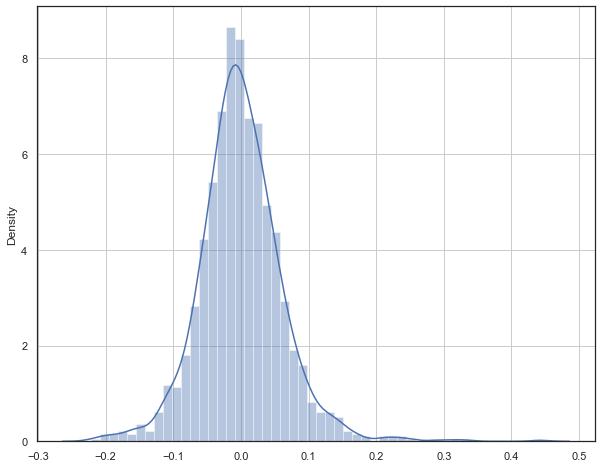

In [154]:
#Distribution of residuals
plt.figure(figsize=(10,8))
sns.distplot(res)
plt.grid()
plt.show()

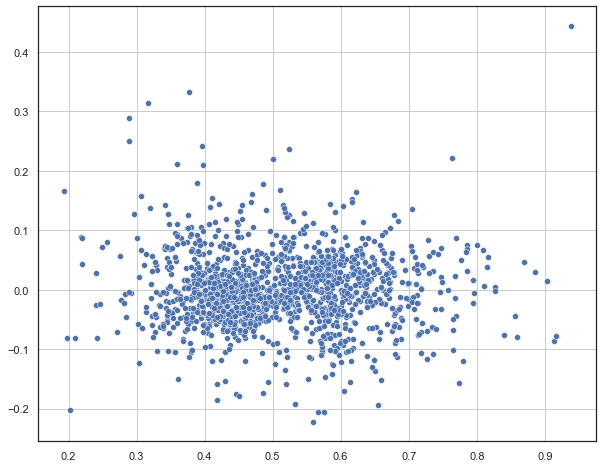

In [155]:
# Homoscedasticity
plt.figure(figsize=(10,8))
sns.scatterplot(y_pred, res)
plt.grid()
plt.show()

Residuals are uniformly distributed. No pattern is observed in plot.

In [156]:
final_fea=lm.params.reset_index()
final_fea.rename(columns={"index":"Features", 0: "Coeff"}, inplace =True)
final_fea.sort_values("Coeff", key=abs, ascending =False, inplace =True)
final_fea.drop(0, inplace=True)

In [157]:
final_fea

,Features,Coeff
1,GrLivArea,0.530559
12,House_Age,-0.266602
11,Functional_Sev,-0.194393
8,Exterior1st_BrkComm,-0.186640
7,Condition2_PosN,-0.174960
9,Heating_Grav,-0.112041
10,Functional_Maj2,-0.104044
5,Neighborhood_StoneBr,0.086541
2,MSSubClass_160,-0.084436
3,Neighborhood_Crawfor,0.082080


As seen above top features that effect the Sale Price are `GrLivArea,House_Age, Functional_Sev and Exterior1st_BrkComm`. Above mentioned features are explaining 78% of the variance in independent variables. Further, even though we have removed Garage Cras from model but it seems like Garagesize do matter to people and thus it is positively linked to sales price.

## 8. Conclusion:

1.	In terms of Predictive power of Ridge Regression is giving best results with alpha of 3 after hyperparameter tunning with adjusted R2 score of 91% with top predictive features as GrLivArea, OverallQual, TotalBsmtSF, OverallCond, GarageCars, BsmtFinSF1 etc.
2.	If five most important predictor variables in the lasso model are not available in the incoming data then next five features are 'FullBath', 'LotArea', 'BsmtQual', 'Fireplaces', 'KitchenQual'
3.	Top features that effect the Sale Price are GrLivArea,House_Age, Functional_Sev and Exterior1st_BrkComm. Above mentioned features are explaining 78 % of the variance in independent variables. Further, alone `GrLivArea,House_Age explain around 71% variance in independent variables.
4.	Price of houses is highly dependent on Ground living area. Further, Company may like to sell houses as soon they are built as house prices tend to decrease as the age of house increase.
5.	In total area of house Garage capacity in term of total no. of cars it can occupy is also important factor for price of house as prices incraed with increase in no. of cars Garrage can occupy.

Reference:
https://stats.stackexchange.com/questions/249283/top-variables-from-lasso-not-significant-in-regular-regression